In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sklearn
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("creditcard.csv")

# EDA
exploratory data analysis.

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# Name of all fearure present in the data
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Shape of the data
data.shape
print(f"data have  {data.shape[0]} row and {data.shape[1]} column")

data have  284807 row and 31 column


In [10]:
# No of unique instances present in each column
data.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [11]:
# Information OF data type , memory used and non null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
# Data types of each column
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [14]:
# AS we have see there is no any null value , we can instead check this by below code
print(data.isna().values.any())
data.isna().sum()

False


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
# checking for any duplicate value
data.duplicated().values.sum()

1081

In [16]:
# Showing the duplicate value
data[data.duplicated()]
#we can customise duplicate value by passing the parameter subset=['coulmn1',column2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [17]:
# Calculating the precentage of fraud and non fraud transaction
not_fraud=round(len(data[data['Class']==0])/len(data)*100,2)
fraud=round(len(data[data['Class']==1])/len(data)*100,2)
print(f"Percentage of fraud transaction is: {fraud}%")
print(f"Percentage of non fraud transaction is : {not_fraud}")

Percentage of fraud transaction is: 0.17%
Percentage of non fraud transaction is : 99.83


AS we see above, the class feature is highly imbalance, WE have to first balance it before feeding into our model.



In [18]:
no_fraud=len(data[data['Class']==0])
fraud=len(data[data['Class']==1])
print(f" No of fraud transaction: {fraud}")
print(f"No of transcation whivh are not fraud :{no_fraud}")


 No of fraud transaction: 492
No of transcation whivh are not fraud :284315


# Univariate analysis.

#we are going to perform univariate analysis on our columns like 
Class
Amount 
Time 
and rest v1  to v28

Text(0.5, 1.0, '0: Non fraudulent 1:fraudulent')

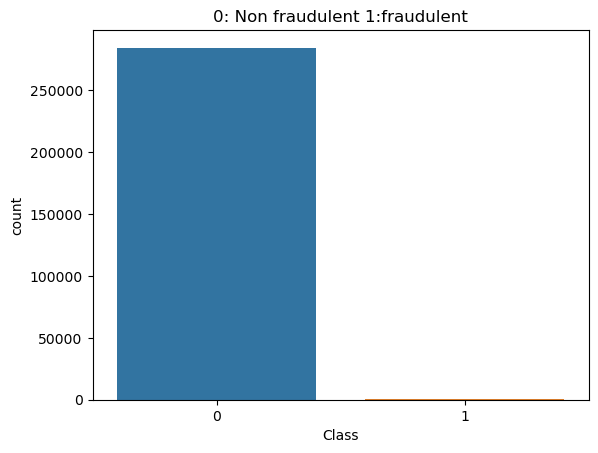

In [19]:
# Class column
sns.countplot(x="Class", data=data)
plt.title("0: Non fraudulent 1:fraudulent")

Text(0.5, 1.0, 'Distribution of amount')

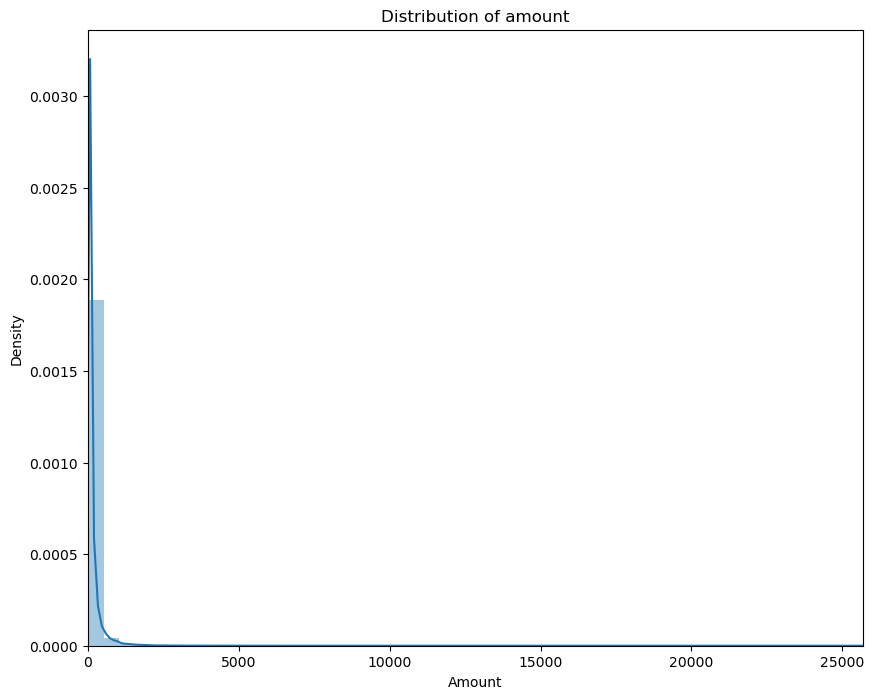

In [20]:
# Univariate analysis on AMount col
amount_value=data["Amount"].values
plt.figure(figsize=(10,8))
Amount=data["Amount"]
sns.distplot(Amount)
plt.xlim(min(amount_value),max(amount_value))
plt.title("Distribution of amount")

Text(0.5, 1.0, 'Time analysis')

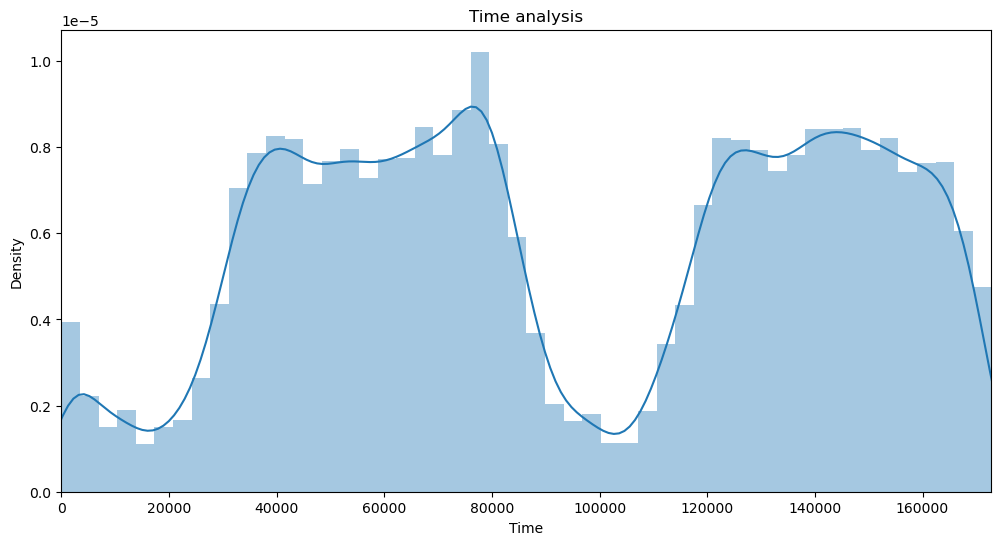

In [5]:
Time_value=data["Time"].values
plt.figure(figsize=(12,6))
sns.distplot(data["Time"])
plt.xlim(min(Time_value), max(Time_value))
plt.title("Time analysis")

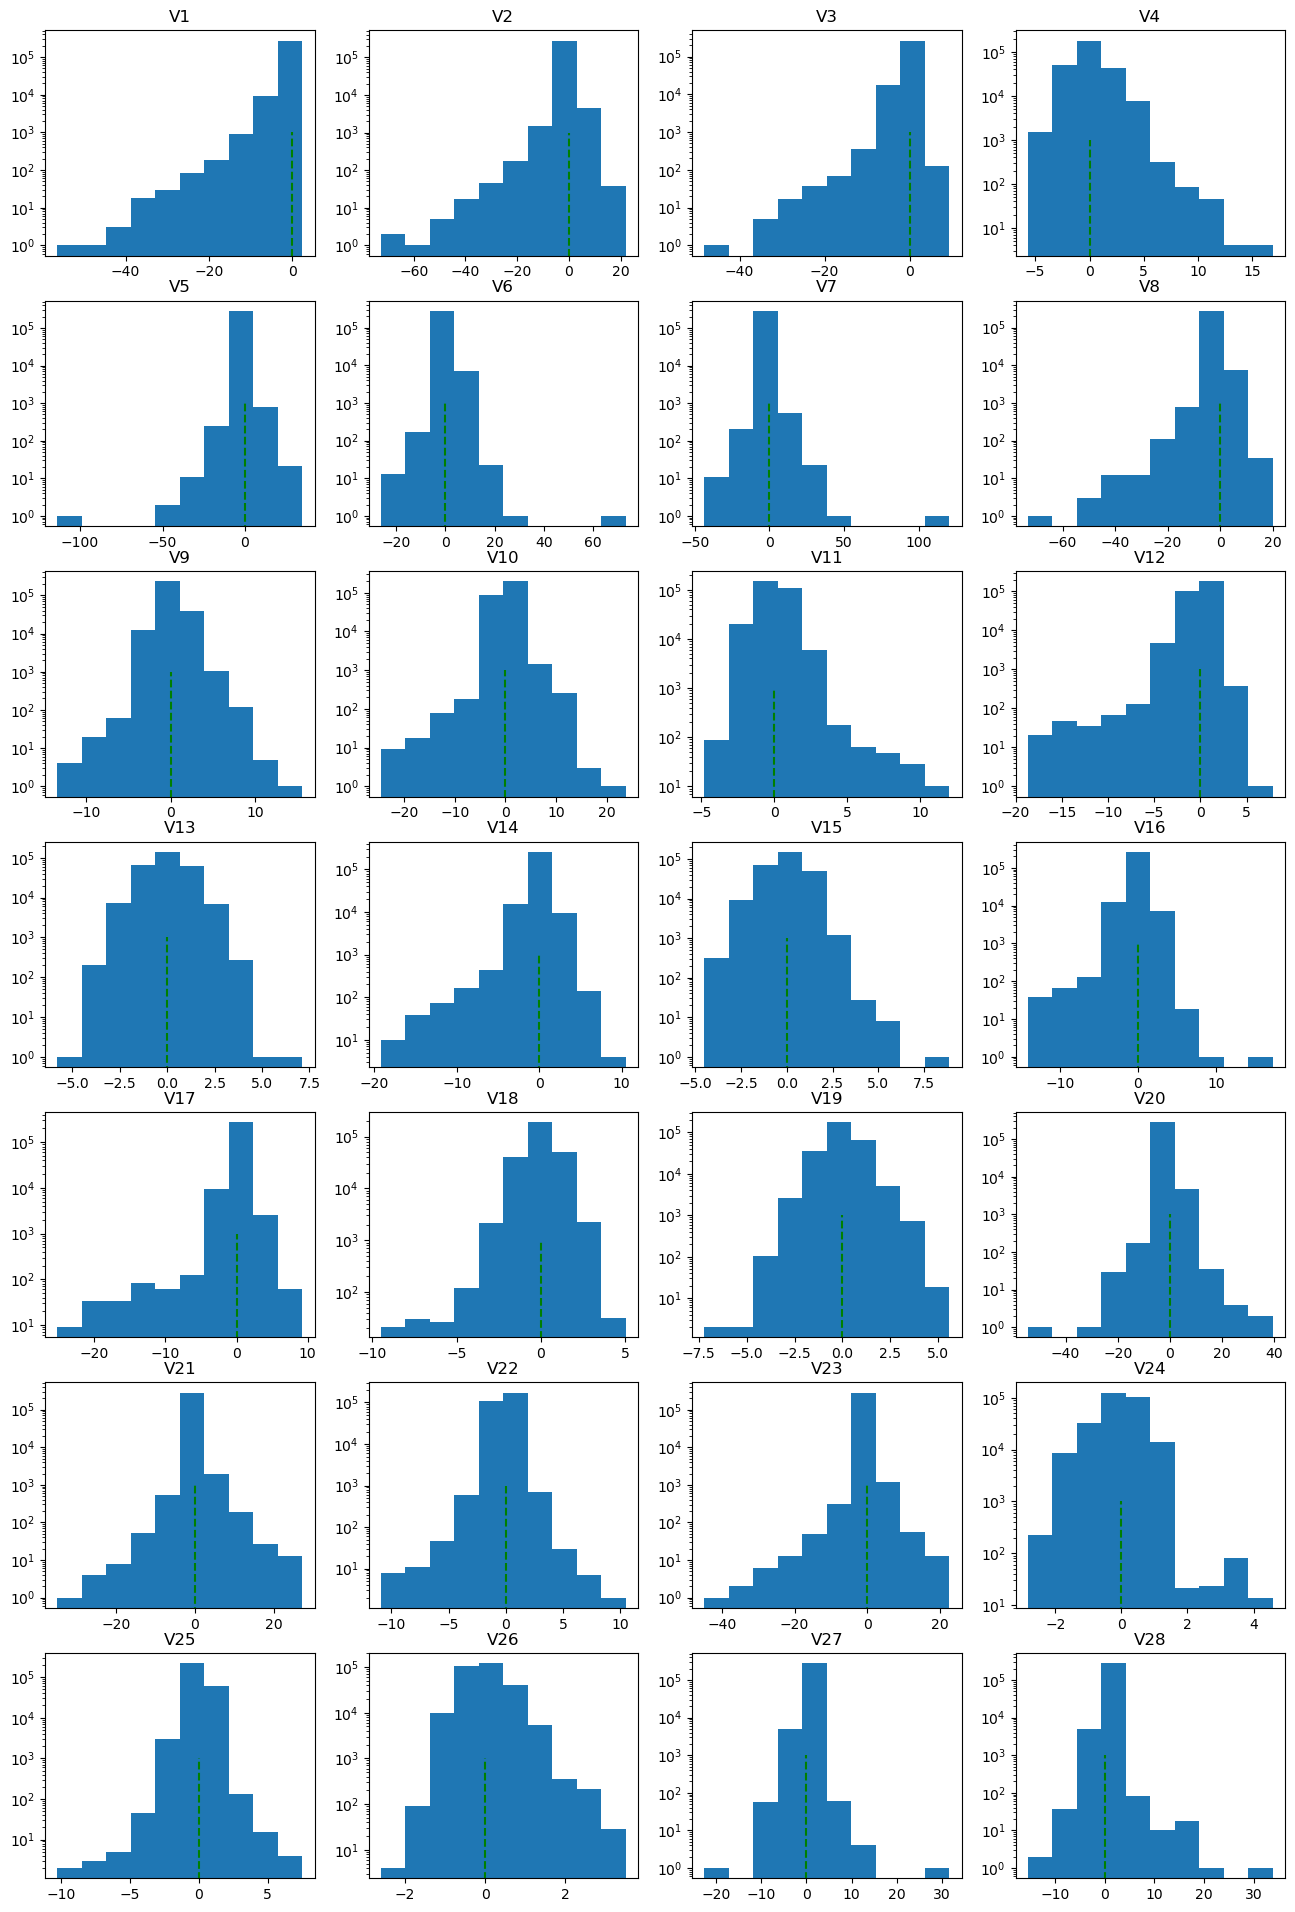

In [22]:
# Now we gonna perform univariate analysis of all the rest feature( v1 to v28).
fig , ax =plt.subplots(nrows=7, ncols=4,figsize=(16,24))
for i in range(1,29):
  m=(i-1)//4
  n=(i-1)%4
  col="V"+str(i)
  ax[m,n].hist(data[col])
  ax[m,n].set_title(col)
  ax[m,n].vlines(x=data[col].mean(),ymin=0,ymax=10**3,linestyle='dashed',colors='g')
  ax[m,n].set_yscale('log')
  # In second last code, we have created a verical line which having x-coordinate at at the mean and its y values ranges from 0 to 1000

# Bivariate analysis

Text(0.5, 1.0, 'Amount vs Class')

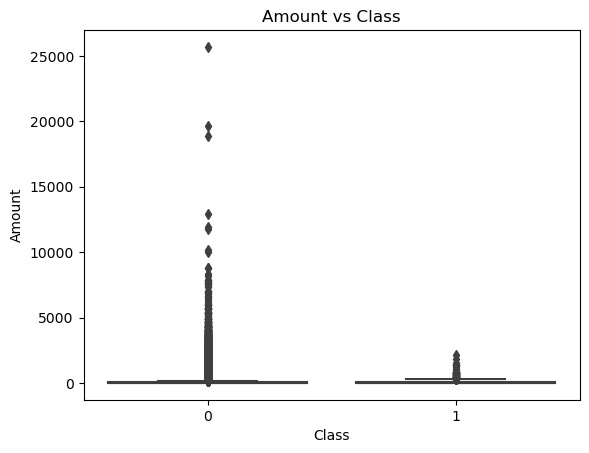

In [23]:
ax=sns.boxplot(x="Class",y="Amount",data=data)

ax.set_title("Amount vs Class")

from the above graph  we can obsearve that very less no of amount greater than 10000( which is of non- fraudelent categories)

In [24]:


data[data["Amount"]>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


Only 7 such rows in which AMount value is greater then 10000

In [6]:
#Excluding the above data and creating a  new dataframe
new_data=data[data["Amount"]<10000]

In [26]:
new_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

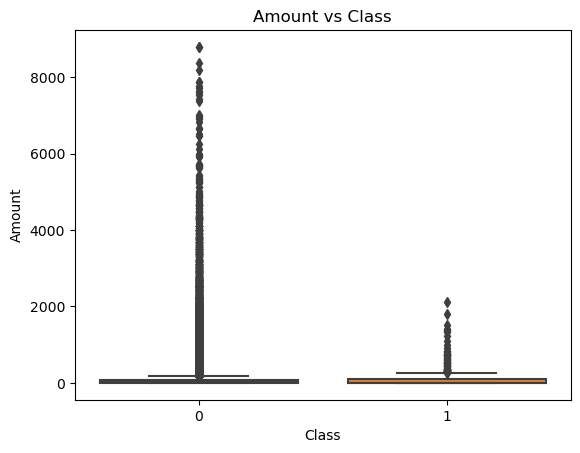

In [27]:
ax=sns.boxplot(x="Class",y="Amount",data=new_data)

ax.set_title("Amount vs Class")

The pd.to_timedelta() function is a pandas function used to convert a sequence of values into timedelta objects. Timedelta represents a duration or difference between two dates or times. It can be used to perform arithmetic operations on time-related data.
assumed to be a column in your DataFrame (data_new) containing numeric values representing time in seconds. The function converts these values to timedelta objects with the unit set to seconds ('s').
unit:-	Denotes the unit of the arg. Possible values: ('Y', 'M', 'W', 'D', 'days', 'day', 'hours','hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N').	str
Default Value: 'ns'


In [8]:
df=new_data
timedelta=pd.to_timedelta(df["Time"],unit='s')
df["Time_min"]=(timedelta.dt.components.minutes).astype(int)
df["Time_hour"]=(timedelta.dt.components.hours).astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284799 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time       284799 non-null  float64
 1   V1         284799 non-null  float64
 2   V2         284799 non-null  float64
 3   V3         284799 non-null  float64
 4   V4         284799 non-null  float64
 5   V5         284799 non-null  float64
 6   V6         284799 non-null  float64
 7   V7         284799 non-null  float64
 8   V8         284799 non-null  float64
 9   V9         284799 non-null  float64
 10  V10        284799 non-null  float64
 11  V11        284799 non-null  float64
 12  V12        284799 non-null  float64
 13  V13        284799 non-null  float64
 14  V14        284799 non-null  float64
 15  V15        284799 non-null  float64
 16  V16        284799 non-null  float64
 17  V17        284799 non-null  float64
 18  V18        284799 non-null  float64
 19  V19        284799 non-n

In [30]:
df.sample(11)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_min,Time_hour
184682,126341.0,-0.228951,0.445544,-0.454991,-1.423019,-0.424341,-1.416273,0.197797,0.209481,-1.085371,...,0.078179,0.023723,-1.078064,0.599197,0.312134,0.236611,9.00,0,5,11
42412,41095.0,-1.268020,0.669154,1.526459,-0.579325,-0.104619,0.501489,0.307588,0.599767,-0.288614,...,-0.245803,-0.697711,0.585727,0.601167,-0.125831,-0.022967,88.00,0,24,11
227387,145056.0,-0.271359,1.298437,0.950946,3.272925,0.923507,0.687485,1.038731,0.185749,-1.977170,...,0.048269,-0.564767,-0.588247,-0.165789,0.133778,0.170118,49.16,0,17,16
138366,82617.0,-0.300345,0.849637,2.379723,1.636517,0.278380,0.904951,0.194853,0.277025,-0.873788,...,-0.139903,-0.354828,-0.340118,-0.117367,-0.104396,-0.198808,0.00,0,56,22
186181,126989.0,0.177167,0.200904,-0.129262,-2.060295,0.287967,-0.982834,0.524973,-0.225099,-1.480669,...,-0.103063,-0.356063,-0.337725,-0.399052,-0.107848,0.011711,4.78,0,16,11
260777,159722.0,1.899420,-0.119252,-2.694732,0.452351,0.981144,-0.088256,0.175483,0.015752,0.824962,...,-0.102224,-0.545173,0.246462,-0.286103,-0.017141,-0.010811,91.72,0,22,20
81264,58856.0,0.985627,-0.999435,0.354369,0.166989,-0.623631,0.920983,-0.696790,0.362604,1.506423,...,-0.164332,-1.304415,0.135563,1.018739,-0.056315,0.017999,150.00,0,20,16
204894,135492.0,-0.424162,-0.789218,-0.459869,-0.386163,-1.448071,1.018666,2.668887,-0.822824,1.120617,...,0.731799,0.499938,-2.092502,-0.071385,0.100903,-0.165079,524.00,0,38,13
249199,154291.0,-1.542520,-0.645494,2.244162,-3.284213,-1.078026,0.310826,-0.689785,-0.478330,0.084381,...,-0.272062,-0.406000,0.275984,0.632047,-0.029494,0.100009,100.00,0,51,18
278482,168243.0,1.888214,-1.434401,-0.398703,-0.812736,-1.452825,-0.473620,-1.100446,0.038036,-0.045939,...,0.050798,0.043217,-0.322505,-0.095238,-0.009643,-0.036533,122.50,0,44,22


Text(0.5, 1.0, 'Amount by Minute of fraud and Normal Transcation')

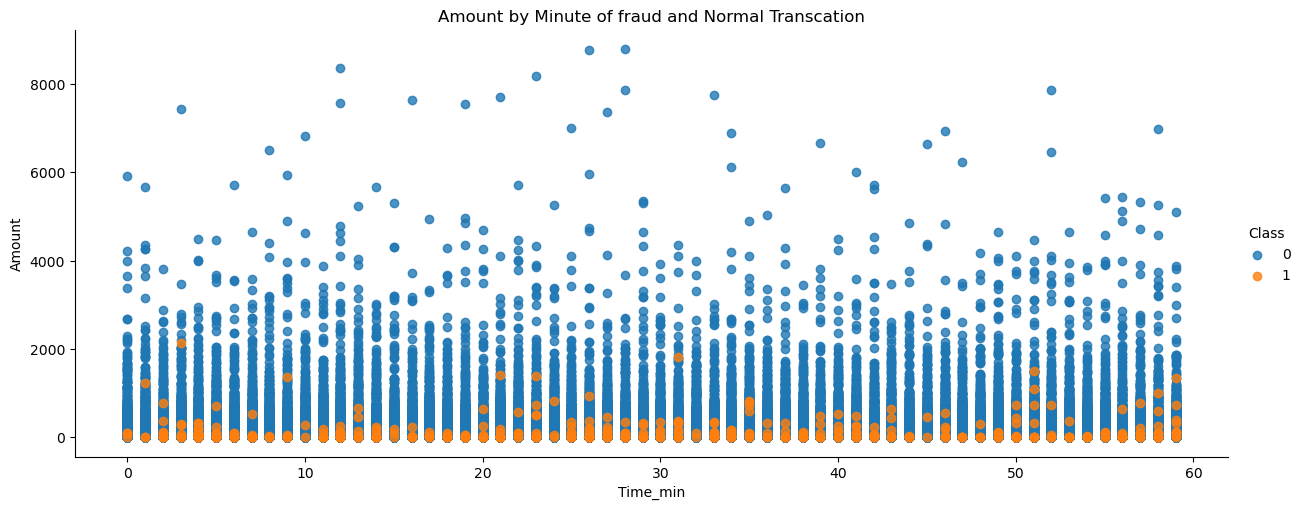

In [31]:

# Now we gonna visualizing the relation between two variable Amount vs time distribution
ax=sns.lmplot(data=df, y="Amount",x="Time_min", hue="Class", aspect=2.5,fit_reg=False)
plt.title("Amount by Minute of fraud and Normal Transcation", fontsize=12)

We observe from the above  Amount vs time_min graph that , both fraud and legitimate transactions are more or less uniformally distributed  throughout time min.

Text(0.5, 1.0, 'Amount by hour of fraud and Normal Transcation')

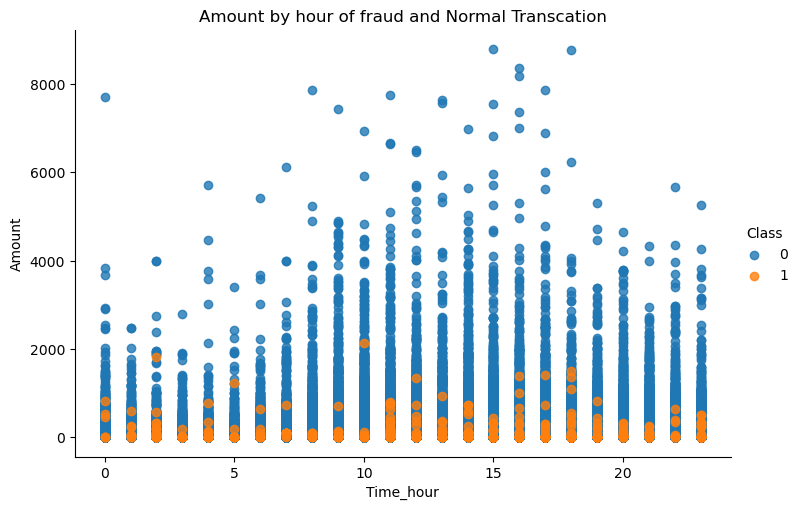

In [32]:
ax=sns.lmplot(data=df,x="Time_hour",y="Amount",hue="Class",aspect=1.5,fit_reg=False)
plt.title("Amount by hour of fraud and Normal Transcation", fontsize=12)

In above plot, Transaction shows a more non uniform distribution across time hours, which  make sense but still no particular pattern observe to distinguish fraud and non fraud through this analysis.
Non fraud transaction is more volumn on active hours as comapred to lean hours

Text(0.5, 1.0, 'Fraud x Normal transactions by hours( Red: Fraud|| Green :Normal)')

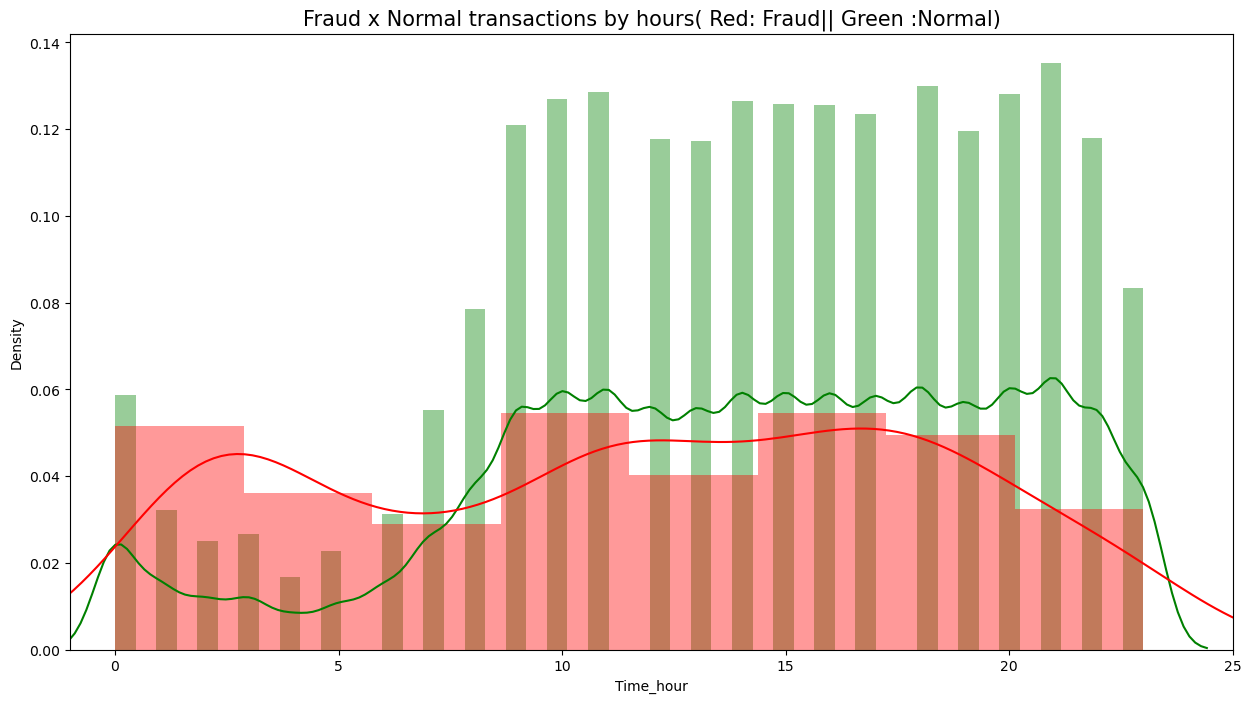

In [33]:
plt.figure(figsize=(15,8))
sns.distplot(df[df["Class"]==0]["Time_hour"],color="g")
sns.distplot(df[df["Class"]==1]["Time_hour"],color="r")
plt.xlim(-1,25)
plt.title("Fraud x Normal transactions by hours( Red: Fraud|| Green :Normal)", fontsize=15)

Hence the above histogram plot confirms the pattern observed about  on fraud and also shows that fraud trasaction are much more uniform across tha day.

# Conclusion from Exploratory data analysis
Data have 284807 rows and 31 features.
1. Data don't have any Nan value
2. Data was highly skewed  with 99.83% of the data being non fradulent transaction 
3. Time column is bimodel distribution, Peak rises and fall and again rises, This is beause of night time
4. Very samll proportion of transaction having amount greater than 10000, eleminated from the data.
5. Most of the transaction were being og amount (<1000), since unit of currency is still unknown 
6. Occurence of fradulent transaction was independent of time of the day.


# Data preprocessing being.
Since our fraudelnt data are very less in number and relatively smaller value(amount) , so we need to have our data sclaed.
Here I am uisng Robust scaler as it not sestivite to outliers , it scaled the data using inter quartile range .


In [10]:
# Using Robust scaler to scale Amount column in our data set
#Added new scaled column "Amount_scaled" to our data set
from sklearn.preprocessing import RobustScaler
rob_scaler=RobustScaler()
df['Amount_scaled']=rob_scaler.fit_transform(df["Amount"].values.reshape(-1,1))
# Value and reshape hata ke dekhna.

In [11]:
# Dropping Time and Amount feature
df.drop(["Amount", "Time"], axis=1,inplace=True)

In [12]:
# Dropping Time_min and Time_hour column 
df.drop(["Time_min",'Time_hour'],axis=1,inplace=True)

In [37]:
#  Now Have a look at our data fraem
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269843
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.984069
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418390
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670626
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-0.256149
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.237703
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,0.262717
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,0.994969
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-0.256009


In [13]:
# Taking our "Amount_scaled" Column from last to first
#1. strong our data in to avaribale scaled _amount
scaled_amount=df["Amount_scaled"]
# Droping "Amount_scaled" from orignal df
df.drop(["Amount_scaled"],axis=1,inplace=True)

# inserting columna at specified index
df.insert(loc=0, column="scaled_amount",value=scaled_amount)


In [39]:
df.sample(2)

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
180710,0.110397,-0.612688,0.324762,1.306180,-0.653768,0.388174,-0.150573,0.303153,-0.060393,0.267128,...,0.033422,0.307599,1.037326,-0.281267,-0.471527,-0.262695,0.601401,-0.007483,0.215222,0
277763,-0.275852,2.044191,-0.052805,-1.424114,0.166594,0.230158,-0.767077,0.149600,-0.225212,0.325255,...,-0.215126,0.283962,0.968805,-0.049630,-0.352211,0.273982,-0.103401,-0.019382,-0.072124,0


Since our data is highly imbalanced, as our fraudulent trascation is very less. We have to first balance our data before feeding in our model.
We are here using undersampling method 

First we are spliting our data by stratifiedKfold. It maintain the Class distribution in both training and testing data, which is much needed in imabalace data like ours.

Stratified K-Folds cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
Generate test sets such that all contain the same distribution of classes, or as close as possible.

##Example code

>>> from sklearn.model_selection import StratifiedKFold
>>> X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
>>> y = np.array([0, 0, 1, 1])
>>> skf = StratifiedKFold(n_splits=2)
>>> skf.get_n_splits(X, y)
2
>>> print(skf)


StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
>>> for i, (train_index, test_index) in enumerate(skf.split(X, y)):
...     print(f"Fold {i}:")
...     print(f"  Train: index={train_index}")
...     print(f"  Test:  index={test_index}")
Fold 0:
  Train: index=[1 3]
  Test:  index=[0 2]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1 3]


In [18]:
# Importing the library StratifiedKFold
from sklearn.model_selection import StratifiedKFold 

X=df.drop('Class',axis=1)
y=df["Class"]


skf=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X,y):
    print(f" Train:{train_index}, test:{test_index}")
    org_xtest, org_xtrain = X.iloc[test_index], X.iloc[train_index]
    org_ytest, org_ytrain = y.iloc[test_index],y.iloc[train_index]
    



 Train:[ 30442  30473  30496 ... 284796 284797 284798], test:[    0     1     2 ... 57016 57017 57018]
 Train:[     0      1      2 ... 284796 284797 284798], test:[ 30442  30473  30496 ... 113962 113963 113964]
 Train:[     0      1      2 ... 284796 284797 284798], test:[ 80757  81183  81606 ... 170942 170943 170944]
 Train:[     0      1      2 ... 284796 284797 284798], test:[150644 150651 150657 ... 227860 227861 227862]
 Train:[     0      1      2 ... 227860 227861 227862], test:[212511 212639 213087 ... 284796 284797 284798]


In [19]:
org_xtest

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
212516,-0.307295,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,-2.515356,...,0.152892,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156
212644,9.864589,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,-1.927359,...,-0.663371,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703
213092,0.006568,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,-0.234786,...,1.060154,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526
213116,-0.191448,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,-3.190158,...,3.569733,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568
214662,1.377026,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,-1.065016,...,-0.173814,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-0.296674,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,0.038988,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,0.641140,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.167691,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [20]:
org_ytrain

0         0
1         0
2         0
3         0
4         0
         ..
227863    0
227864    0
227865    0
227866    0
227867    0
Name: Class, Length: 227840, dtype: int64

In [21]:
org_ytest

212516    1
212644    1
213092    1
213116    1
214662    1
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 56959, dtype: int64

In [22]:
org_xtrain

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227863,1.013136,1.756924,-0.523307,-0.868036,1.543427,-0.161653,0.139893,-0.096847,0.106379,1.024811,...,0.616636,-0.181831,-0.260954,-0.625009,0.123315,-0.451590,-0.009264,-0.819147,0.014973,-0.044333
227864,-0.296814,-1.329248,2.057312,0.417536,3.259226,2.031582,5.808571,-1.966416,-0.780131,-2.361387,...,0.940716,0.962591,-1.447473,-0.254170,0.172166,0.624782,-0.092178,0.215728,0.223553,0.132879
227865,-0.167831,2.036041,0.259237,-1.771522,0.458296,0.584333,-0.820823,0.305824,-0.271230,0.549965,...,-0.023326,-0.113310,-0.317084,-0.740493,0.283709,0.488747,-0.063826,-0.610194,0.007487,-0.013918
227866,0.475126,-1.246150,0.863064,0.478690,0.405342,0.203485,0.168488,-0.136939,0.682942,-2.009559,...,-0.277785,-0.013211,-0.319465,-0.588918,-0.186107,0.468036,0.571794,-0.403076,0.259078,0.077267


In [23]:
# Converting it into array
org_xtest=org_xtest.values
org_xtrain=org_xtrain.values
org_ytest=org_ytest.values
org_ytrain=org_ytrain.values


In [24]:
org_xtest

array([[-3.07294578e-01, -1.29844323e+00,  1.94810045e+00, ...,
         8.41294588e-01,  6.43094249e-01,  2.01155750e-01],
       [ 9.86458916e+00, -2.35634817e+00,  1.74636046e+00, ...,
         1.08361135e-01,  1.13082816e+00,  4.15702789e-01],
       [ 6.56791504e-03, -4.66650010e+00, -3.95232009e+00, ...,
         6.30638836e-01, -5.13880223e-01,  7.29525850e-01],
       ...,
       [ 6.41140302e-01,  1.91956501e+00, -3.01253846e-01, ...,
        -8.73705959e-02,  4.45477214e-03, -2.65608286e-02],
       [-1.67691448e-01, -2.40440050e-01,  5.30482513e-01, ...,
         5.46668462e-01,  1.08820735e-01,  1.04532821e-01],
       [ 2.72498603e+00, -5.33412522e-01, -1.89733337e-01, ...,
        -8.18267121e-01, -2.41530880e-03,  1.36489143e-02]])

In [25]:
org_ytest

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
org_xtrain

array([[ 1.78339855, -1.35980713, -0.07278117, ..., -0.18911484,
         0.13355838, -0.02105305],
       [-0.26984349,  1.19185711,  0.26615071, ...,  0.12589453,
        -0.0089831 ,  0.01472417],
       [ 4.98406931, -1.35835406, -1.34016307, ..., -0.13909657,
        -0.05535279, -0.05975184],
       ...,
       [-0.16783119,  2.03604101,  0.25923711, ..., -0.61019416,
         0.00748731, -0.01391751],
       [ 0.47512577, -1.24615005,  0.86306391, ..., -0.40307615,
         0.25907773,  0.07726675],
       [-0.16783119, -0.11060264,  0.85805725, ..., -0.19372256,
         0.14398337,  0.134559  ]])

In [49]:
org_ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

 ## RandomOverSampler to handle imbalanced data




In [27]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)
print(X_res.shape,y_res.shape)

(984, 29) (984,)


In [28]:
print(f" Original data set shape: {y.value_counts()}")
print(f"resample data set shape:{y_res.value_counts()}")

 Original data set shape: 0    284307
1       492
Name: Class, dtype: int64
resample data set shape:0    492
1    492
Name: Class, dtype: int64


In [29]:
# Compare no of zeros and ones in originalo and resampled data
from collections import Counter
print(f" Original data set shape: {Counter(y)}")
print(f"resample data set shape:{Counter(y_res)}")

 Original data set shape: Counter({0: 284307, 1: 492})
resample data set shape:Counter({0: 492, 1: 492})


#Another way to handel imbalance data (basically we are doing under-sampling)


The sample() function in Pandas is used to randomly select a specified fraction or number of rows from a DataFrame. 
By setting frac=1, we are instructing the sample() function to randomly shuffle all the rows of the DataFrame

In [30]:
df=df.sample(frac=1)
fraud_df=df[df['Class']==1]
not_fraud_df=df[df["Class"]==0][:492]
normal_distributed_df=pd.concat([fraud_df,not_fraud_df])
normal_distributed_df.shape

(984, 30)

<Axes: ylabel='Density'>

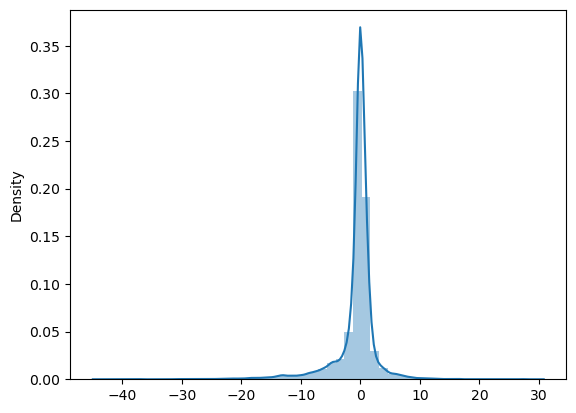

In [31]:
sns.distplot(normal_distributed_df)

In [32]:
# Creating new daataframe
new_df=normal_distributed_df.sample(frac=1,random_state=42)
new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
25052,-0.202627,1.100212,0.006598,0.432901,1.463070,-0.126973,1.117730,-0.838785,0.508635,0.968533,...,-0.128610,0.044290,0.506887,-0.286267,-0.920982,0.689404,-0.047249,0.108449,0.041572,0
82400,-0.042202,-7.626924,-6.976420,-2.077911,3.416754,4.458758,-5.080408,-6.578948,1.760341,-0.599509,...,2.875260,1.224795,-0.656639,-0.330811,-0.078946,0.270306,0.431119,0.821381,-1.056088,1
210293,-0.000838,2.026484,-0.860693,0.067675,-0.117687,-1.699990,-1.285991,-0.837506,-0.171633,-0.037022,...,-0.621379,-0.561926,-1.096502,0.627260,0.867043,-0.893784,0.176525,-0.016946,-0.028063,0
14197,1.089855,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,...,1.534920,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1
204079,1.208916,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,0.802053,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1


In [33]:
# Now see the no of zero and ones on class feature
print(" Equal-Equal  Hai  ")
new_df["Class"].value_counts()


 Equal-Equal  Hai  


0    492
1    492
Name: Class, dtype: int64

### Correlation HeatMap

In [57]:
cor=new_df.corr()
cor

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
scaled_amount,1.000000,-0.021734,-0.216590,-0.006564,0.014507,-0.109807,0.142645,0.121421,0.029903,0.006678,...,0.126866,0.025729,-0.017705,-0.129109,-0.016325,-0.059209,-0.064396,0.078048,-0.061966,0.096216
V1,-0.021734,1.000000,-0.795679,0.880887,-0.602670,0.857240,0.309972,0.879036,-0.085736,0.637304,...,-0.236955,0.024372,-0.048632,-0.071519,-0.069001,-0.092211,0.052578,0.180545,0.185476,-0.424452
V2,-0.216590,-0.795679,1.000000,-0.854159,0.660501,-0.799794,-0.278019,-0.847288,-0.016845,-0.684883,...,0.369533,0.045823,-0.021852,0.099834,0.014228,0.087187,-0.009003,-0.175954,-0.009008,0.473155
V3,-0.006564,0.880887,-0.854159,1.000000,-0.768997,0.853140,0.475347,0.891339,-0.173018,0.756233,...,-0.310434,0.027885,-0.061309,-0.030089,0.011498,-0.094932,-0.012291,0.093561,0.125052,-0.563671
V4,0.014507,-0.602670,0.660501,-0.768997,1.000000,-0.580568,-0.433704,-0.711269,0.106075,-0.792354,...,0.241569,-0.014736,0.111726,0.019169,-0.066335,-0.012862,0.159880,0.004473,-0.065827,0.711797
V5,-0.109807,0.857240,-0.799794,0.853140,-0.580568,1.000000,0.311282,0.844674,-0.211430,0.659096,...,-0.310886,0.034297,-0.085347,-0.072816,-0.134301,-0.076689,0.065805,0.188859,0.176445,-0.374804
V6,0.142645,0.309972,-0.278019,0.475347,-0.433704,0.311282,1.000000,0.280581,-0.595455,0.370559,...,-0.063752,0.001416,0.005194,0.339982,-0.042810,-0.121934,-0.064400,-0.175356,-0.039988,-0.400814
V7,0.121421,0.879036,-0.847288,0.891339,-0.711269,0.844674,0.280581,1.000000,0.088085,0.760610,...,-0.347362,0.040583,-0.119411,-0.081656,-0.056999,0.059319,0.027570,0.225579,0.146087,-0.479152
V8,0.029903,-0.085736,-0.016845,-0.173018,0.106075,-0.211430,-0.595455,0.088085,1.000000,-0.069823,...,-0.044087,-0.095856,0.020048,-0.423116,0.059798,0.229332,0.051146,0.283484,-0.009453,0.060674
V9,0.006678,0.637304,-0.684883,0.756233,-0.792354,0.659096,0.370559,0.760610,-0.069823,1.000000,...,-0.348579,0.150429,-0.219860,-0.032779,0.012210,0.011532,-0.128609,0.110465,0.110863,-0.556498


In [58]:
# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# # comparing correlation between dataset
# # Entire DataFrame
# corr = df.corr()
# sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
# ax1.set_title("Imbalanced Correlation Matrix" , fontsize=14)

# # new_df
# sub_sample_corr = new_df.corr()
# sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
# ax2.set_title("subSample Correlation Matrix", fontsize=14) 

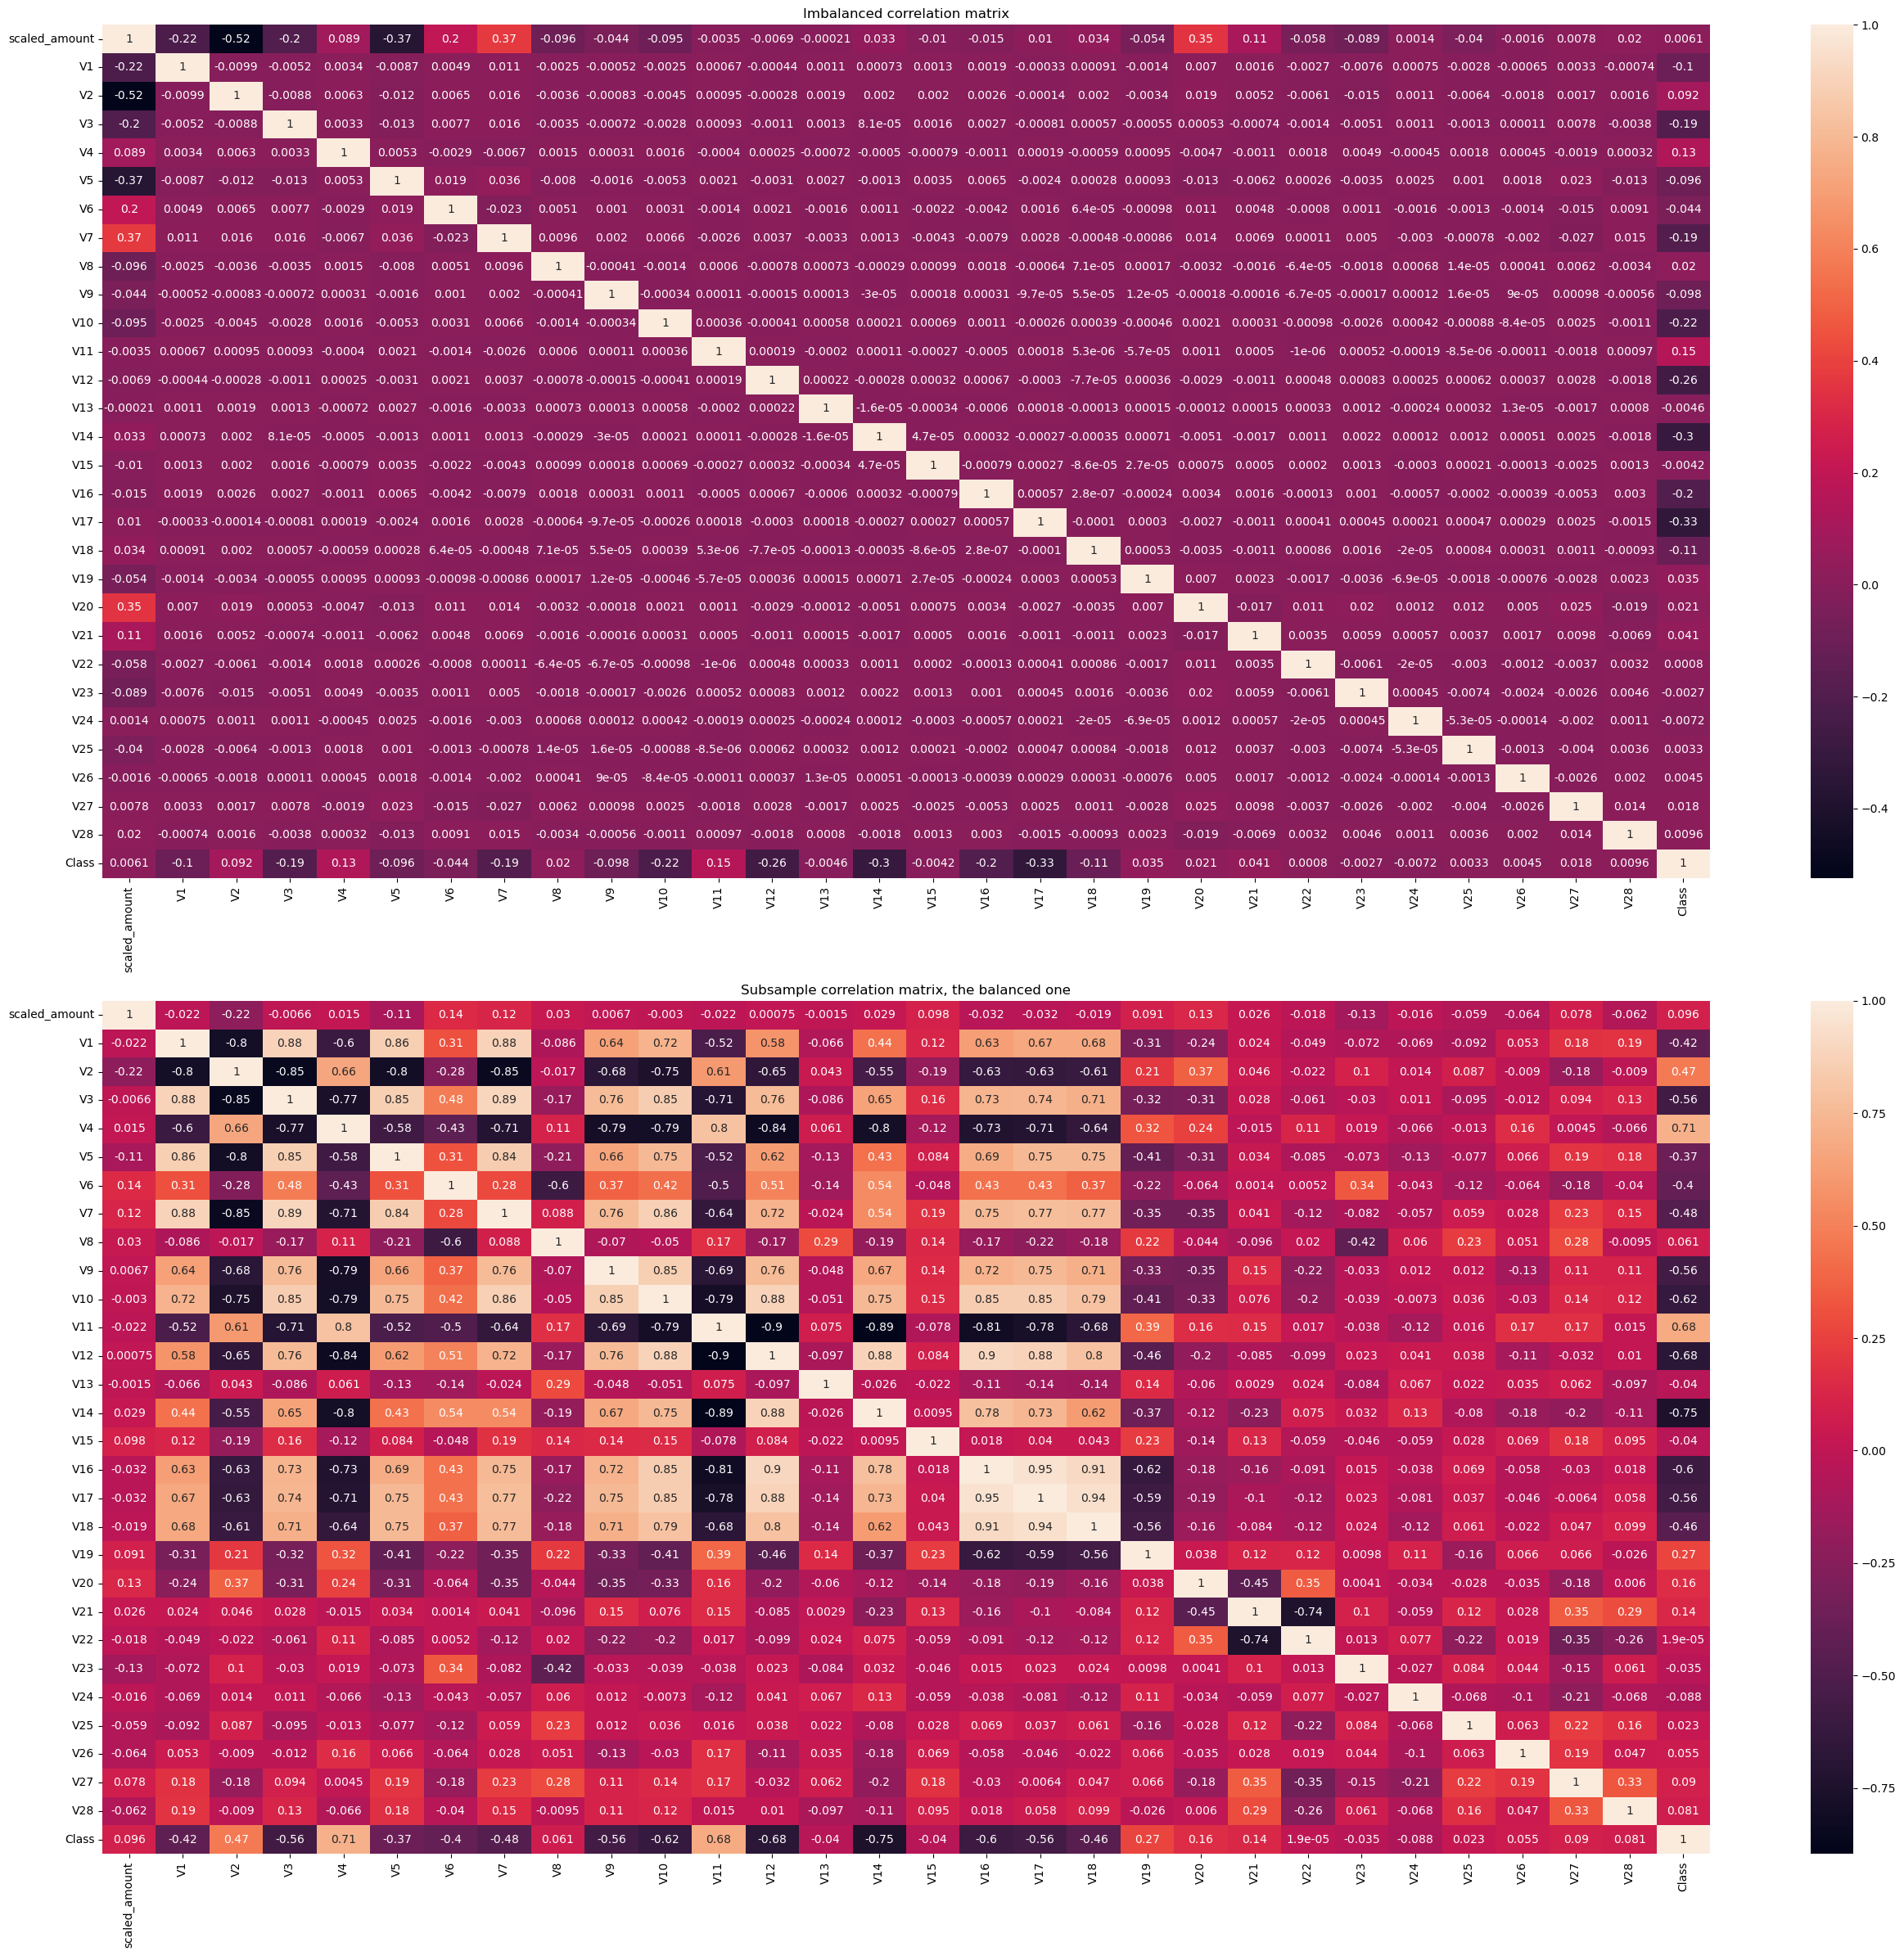

In [59]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(26, 24))

# Entire original data
corr_org = df.corr()
sns.heatmap(corr_org, annot=True, ax=axes[0])
axes[0].set_title("Imbalanced correlation matrix")

# Our new balanced data
balance_corr = new_df.corr()
sns.heatmap(balance_corr, annot=True, ax=axes[1])
axes[1].set_title("Subsample correlation matrix, the balanced one")

# Adjust the spacing between subplots
plt.tight_layout()




As we can see, There is very less correlation among  the features in the original dataset , But In our balanced data set 

By looking at the correlation matrix we found that there is very less correlation between features in original data set but  In our Balanced dataset we can visualize correlation easily 

### Outlier Detectiona and Removal 

In [60]:
cor=new_df.corr()
print("Show the correlation of class feature with all other feature")
cor[['Class']]

Show the correlation of class feature with all other feature


,Class
scaled_amount,0.096216
V1,-0.424452
V2,0.473155
V3,-0.563671
V4,0.711797
V5,-0.374804
V6,-0.400814
V7,-0.479152
V8,0.060674
V9,-0.556498


In [61]:
# feature having correlation less than -0.6 with Class
cor[cor.Class<-0.6]["Class"]

V10   -0.623851
V12   -0.683634
V14   -0.748615
Name: Class, dtype: float64

V10,V12,V14 are highly negatively correlated with class

In [62]:
# Feature having correlation greater than 0.5 with Class
cor[cor.Class>0.5]['Class']

V4       0.711797
V11      0.681918
Class    1.000000
Name: Class, dtype: float64

V4,V11 are highly Postively correlated with class.

Text(0.5, 1.0, 'Correlation of V10 with Class')

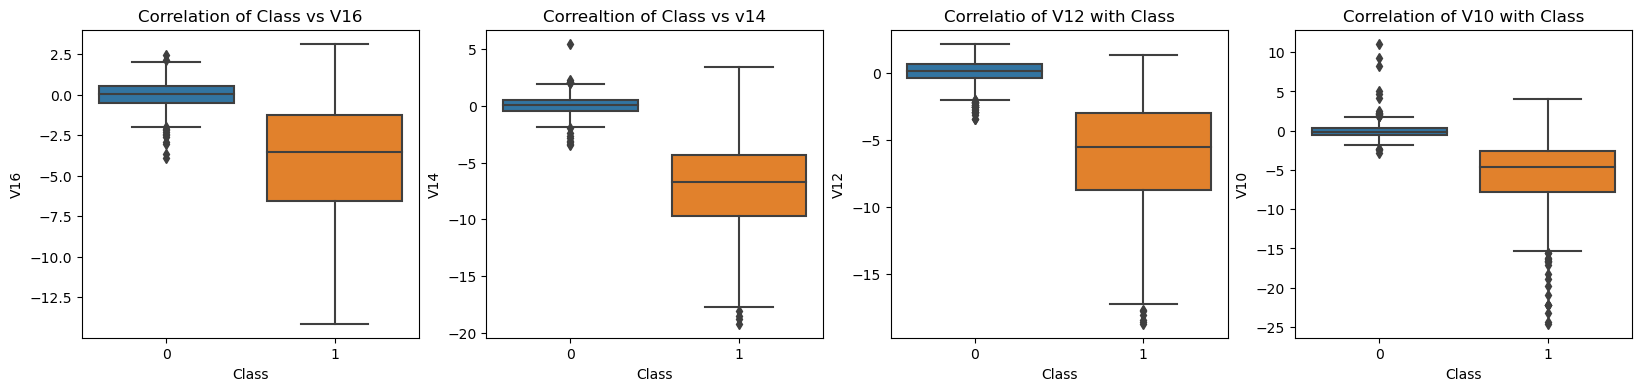

In [34]:
#We are now visualizing negaive correlation of all those feature with our class
fig, axes=plt.subplots(ncols=4,nrows=1 ,figsize=(20,4))

# Negaive correlation of V16 with class
sns.boxplot(x="Class",y="V16",data=new_df,ax=axes[0])
axes[0].set_title("Correlation of Class vs V16")

# Negaive correlation of V14 with class
sns.boxplot(x="Class",y="V14",data=new_df,ax=axes[1])
axes[1].set_title("Correaltion of Class vs v14")
# Negaive correlation of V112 with class
sns.boxplot(x="Class",y="V12",data=new_df,ax=axes[2])
axes[2].set_title("Correlatio of V12 with Class")
# Negaive correlation of V10 with class
sns.boxplot(x="Class",y="V10",data=new_df,ax=axes[3])
axes[3].set_title("Correlation of V10 with Class")

Text(0.5, 1.0, 'Positive correlation of Class with V11')

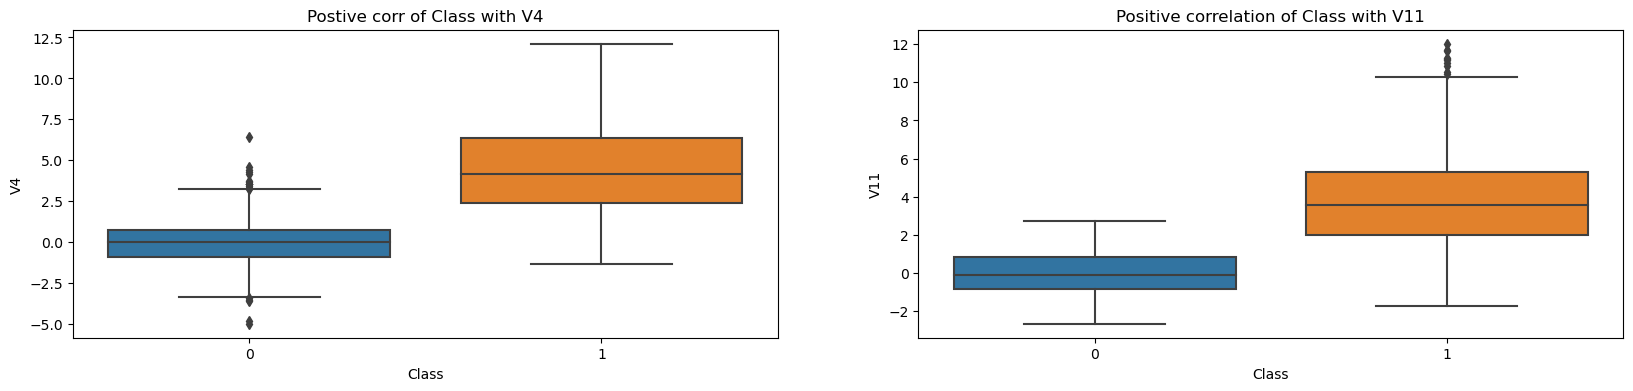

In [35]:
Fig, axes =plt.subplots(ncols=2,nrows=1,figsize=(20,4))
# Postivie correlation of V4 with Class
sns.boxplot(x="Class",y="V4",data=new_df,ax=axes[0])
axes[0].set_title("Postive corr of Class with V4")
 # Class with V11
sns.boxplot(x="Class",y="V11", data=new_df, ax=axes[1])
axes[1].set_title("Positive correlation of Class with V11")

Text(0.5, 1.0, 'V14 Fraud Distribution')

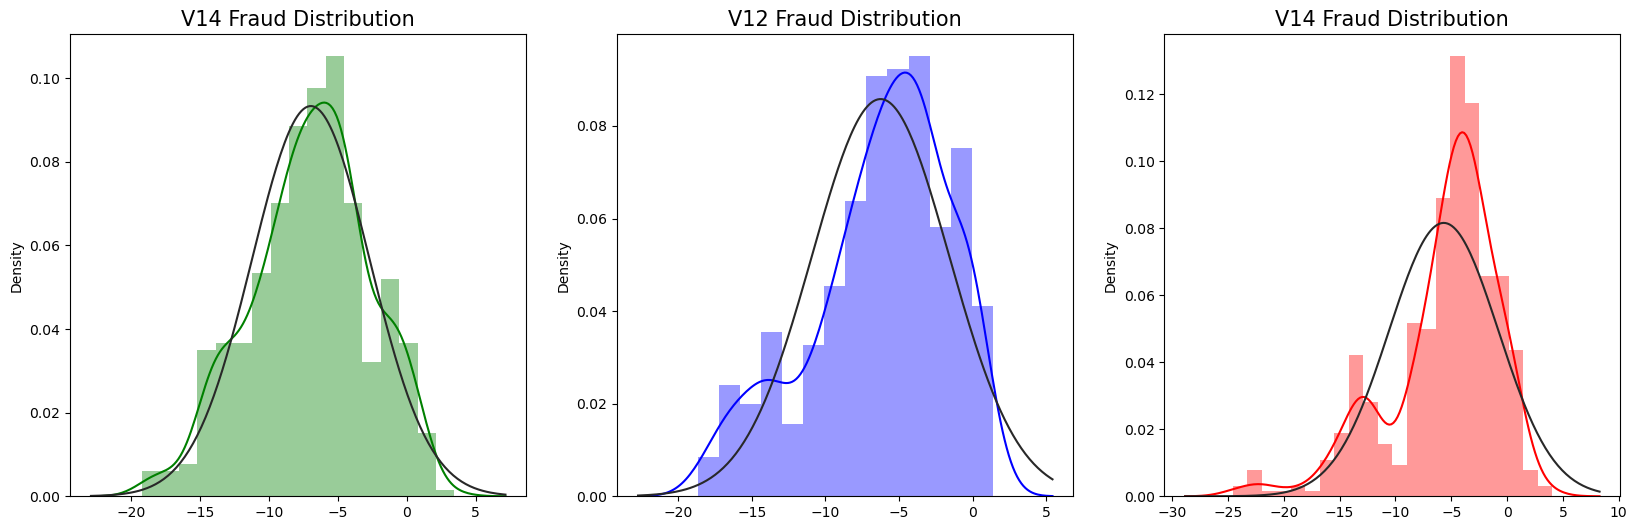

In [36]:
 # We are analyzing The distribution of V14, V12,V10  corresponding to fraud transaction 

from scipy.stats import norm

# Creating subplot
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))

# V14 instances corresponding to fraud data.
v14_fraud_list=new_df["V14"].loc[new_df["Class"]==1].values
sns.distplot(v14_fraud_list,ax=ax1,color="g",fit=norm)
ax1.set_title("V14 Fraud Distribution", fontsize=15)

# V12 instances corresponding to fraud data.
v12_fraud_list=new_df["V12"].loc[new_df["Class"]==1].values
sns.distplot(v12_fraud_list,ax=ax2,color="b",fit=norm)
ax2.set_title("V12 Fraud Distribution", fontsize=15)

# V10 instances corresponding to fraud data.
v10_fraud_list=new_df["V10"].loc[new_df["Class"]==1].values
sns.distplot(v10_fraud_list,ax=ax3,color="r",fit=norm)
ax3.set_title("V14 Fraud Distribution", fontsize=15)




## Removing Outliers

Values which don't lie in this range (Q1-1.5*IQR, Q3+1.5*IQR) are outliers
Q1=25th percentile
Q3 75th percentile
IQR=Q3 - Q1



In [37]:
# V14 Outlier detection and removal
v14_fraud=new_df["V14"].loc[new_df["Class"]==1].values
v14_25, v14_75 = np.percentile(v14_fraud,25),np.percentile(v14_fraud,75)
v14_iqr=v14_75-v14_25
v14_cutoff=v14_iqr*1.5
v14_lower,v14_upper= v14_25-v14_cutoff, v14_75+v14_cutoff
print(f"v14_25:{v14_25}, v14_75:{v14_75}")
print("v14_iqr:{}".format(v14_iqr))
print("v14_cutoff{}".format(v14_cutoff))
print(f"v14_lower:{v14_lower},v14_upper:{v14_upper}")

# Outlier detection.
outliers=[x for x in v14_fraud if x < v14_lower or x > v14_upper]

print("Outliers : {}".format(outliers))

# Now dropping these outlier value
new_df=new_df.drop(new_df[(new_df["V14"]<v14_lower) | (new_df["V14"]>v14_upper)].index)

v14_25:-9.692722964972386, v14_75:-4.282820849486865
v14_iqr:5.409902115485521
v14_cutoff8.114853173228282
v14_lower:-17.807576138200666,v14_upper:3.8320323237414167
Outliers : [-18.4937733551053, -19.2143254902614, -18.0499976898594, -18.8220867423816]


In [38]:
# I run this code just before executing the above code. and these are the index of v14_fraud outlier values
#new_df[(new_df["V14"]<v14_lower) | (new_df["V14"]>v14_upper)].index

In [39]:
# After droping v14_fraud outlier, no longer such data exist
new_df[(new_df["V14"]<v14_lower) | (new_df["V14"]>v14_upper)]

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class


In [40]:
# performing outlier detection and removal from v12 col corresponding to fraud transaction.
v12_fraud=new_df["V12"].loc[new_df["Class"]==1].values
v12_25, v12_75 = np.percentile(v12_fraud,25),np.percentile(v12_fraud,75)
v12_iqr=v12_75-v12_25
v12_cutoff=v12_iqr*1.5
v12_lower,v12_upper= v12_25-v12_cutoff, v12_75+v12_cutoff
print(f"v12_25:{v12_25}, v12_75:{v12_75}")
print("v12_iqr:{}".format(v12_iqr))
print("v12_cutoff{}".format(v12_cutoff))
print(f"v12_lower:{v12_lower},v12_upper:{v12_upper}")

# Outlier detection.
outliers=[x for x in v12_fraud if x < v12_lower or x > v12_upper]

print("Outliers : {}".format(outliers))

# Now dropping these outlier value
new_df=new_df.drop(new_df[(new_df["V12"]<v12_lower) | (new_df["V12"]>v12_upper)].index)

v12_25:-8.67303320439115, v12_75:-2.893030568676315
v12_iqr:5.780002635714835
v12_cutoff8.670003953572252
v12_lower:-17.3430371579634,v12_upper:5.776973384895937
Outliers : [-18.6837146333443, -18.0475965708216, -18.4311310279993, -18.5536970096458]


In [41]:
# performing outlier detection and removal of V10 col corresponding to fraud transaction.
v10_fraud=new_df["V10"].loc[new_df["Class"]==1].values
v10_25, v10_75 = np.percentile(v10_fraud,25),np.percentile(v10_fraud,75)
v10_iqr=v10_75-v10_25
v10_cutoff=v10_iqr*1.5
v10_lower,v10_upper= v10_25-v10_cutoff, v10_75+v10_cutoff
print(f"v10_25:{v10_25}, v10_75:{v10_75}")
print("v10_iqr:{}".format(v10_iqr))
print("v10_cutoff{}".format(v10_cutoff))
print(f"v10_lower:{v10_lower},v10_upper:{v10_upper}")

# Outlier detection.
outliers=[x for x in v10_fraud if x < v10_lower or x > v10_upper]

print("Outliers : {}".format(outliers))

# Now dropping these outlier value
new_df=new_df.drop(new_df[(new_df["V10"]<v10_lower) | (new_df["V10"]>v10_upper)].index)

v10_25:-7.466658535821847, v10_75:-2.5118611381562523
v10_iqr:4.954797397665595
v10_cutoff7.432196096498393
v10_lower:-14.89885463232024,v10_upper:4.92033495834214
Outliers : [-15.1237521803455, -16.3035376590131, -15.1241628144947, -18.2711681738888, -16.7460441053944, -15.3460988468775, -22.1870885620007, -14.9246547735487, -16.6011969664137, -15.2399619587112, -14.9246547735487, -20.9491915543611, -16.6496281595399, -15.2318333653018, -17.1415136412892, -22.1870885620007, -15.5637913387301, -24.4031849699728, -23.2282548357516, -24.5882624372475, -19.836148851696, -15.5637913387301, -22.1870885620007, -18.9132433348732, -22.1870885620007, -15.2399619587112, -16.2556117491401]


Text(0.5, 1.0, 'V10\n Reduction of outliers')

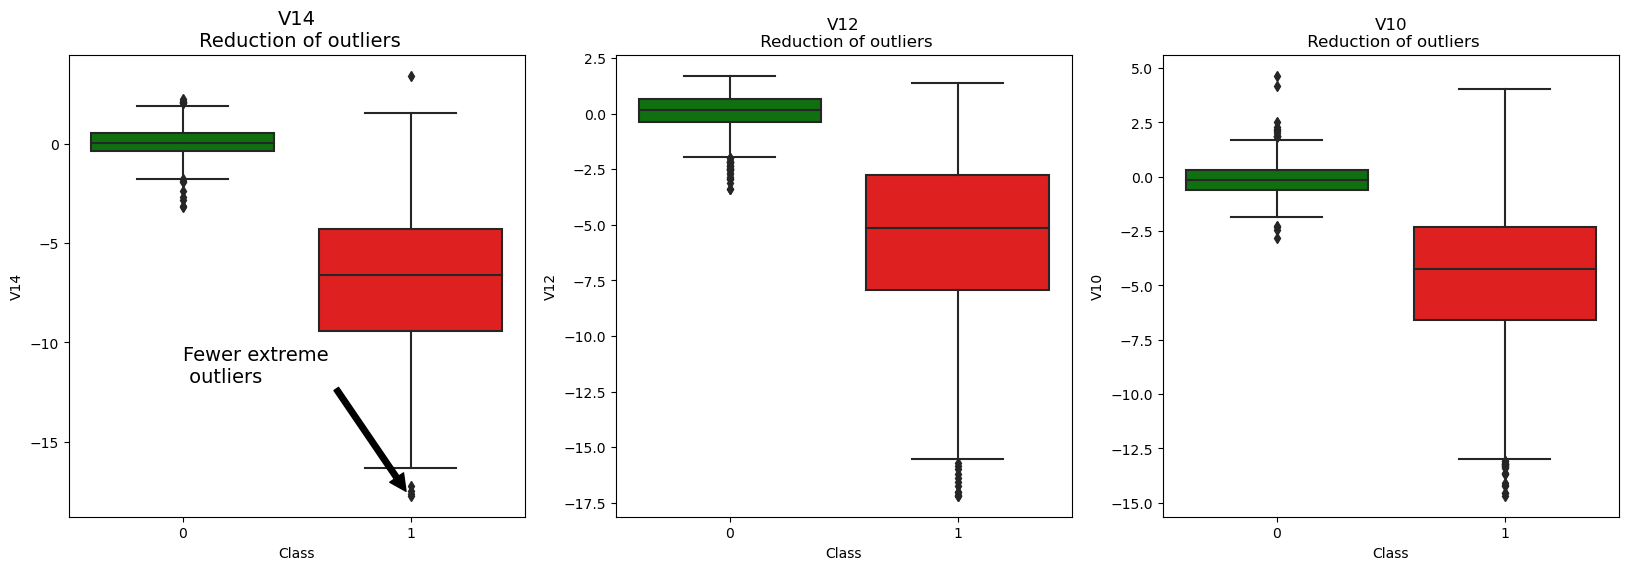

In [42]:
# Lets visualize this through boxplot 
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))
colors=["green","red"]

# feature v14
sns.boxplot(data=new_df,x="Class",y="V14",ax=ax1,palette=colors)
ax1.set_title("V14\n Reduction of outliers",fontsize=14)
# Showing annotation by arrow
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)


#feature v12
sns.boxplot(data=new_df,x="Class",y="V12",ax=ax2,palette=colors)
ax2.set_title("V12\n Reduction of outliers")

# feature v10
sns.boxplot(data=new_df,x="Class",y="V10",ax=ax3,palette=colors)
ax3.set_title("V10\n Reduction of outliers")



## Dimensionality Reduction
As our data have huge dimension and visualization in more than 3D is not possible .

In [43]:
# Pca, TruncatedSVD
from sklearn.decomposition import PCA, TruncatedSVD
#TNSE

from sklearn.manifold import  TSNE
# Importing Time
import time


In [44]:
# Creating out indepenadent variable (X) & dependent variable (y)
X=new_df.drop("Class",axis=1)
y=new_df["Class"]

# Implementing PCA
t0=time.time()
x_pca_red=PCA( n_components=2,random_state=42).fit_transform(X.values)

t1=time.time()
print("PCA tooks {:.2}".format(t1-t0))


PCA tooks 0.041


In [45]:
#Implementing TSNE
t0=time.time()
x_tsne_red=TSNE(n_components=2,random_state=42).fit_transform(X.values)

t1=time.time()
print("TSNE tooks {:.2} min".format(t1-t0))

TSNE tooks 2.3 min


In [46]:
# Implementing TruncatedSVD
t0=time.time()
X_truncatedsvd_red=TruncatedSVD(n_components=2,random_state=42).fit_transform(X.values)
t1=time.time()
print(f"Time tooks by TruncatedSVD is: {t1-t0}")


Time tooks by TruncatedSVD is: 0.010181188583374023


In [47]:
print(x_pca_red)

print(f"Dimention:{x_pca_red.ndim}")
print(f"shape: {x_pca_red.shape}")
# simple slicing , print entire row of first column
x_pca_red[:,0]
# Printing entire row of second column
x_pca_red[:,1]

[[-7.93681459 -0.57073221]
 [ 2.31677825  0.44886392]
 [-8.22193049 -1.19165209]
 ...
 [-8.20753777 -1.04830869]
 [ 1.46356907  0.39730107]
 [ 3.50579915  5.03449677]]
Dimention:2
shape: (944, 2)


array([-5.70732208e-01,  4.48863920e-01, -1.19165209e+00, -1.08105014e+01,
       -6.55614883e-01, -9.36762352e-01, -5.52251673e-01,  6.13654953e+00,
       -2.48216075e+00, -1.12254670e+00,  3.49422804e+00, -1.98938647e+00,
       -8.82233202e-01, -1.01769671e+00,  9.56859647e-01,  6.11007395e+00,
       -9.88407169e-01, -6.67579354e-01, -2.10100067e+00,  5.76595465e+00,
       -6.15829783e-01,  4.55063387e+00, -5.48841511e-01,  4.35806480e+00,
       -9.05216087e-01,  7.11663638e-01,  1.63109811e+00,  8.06522394e-01,
       -1.28687937e+00,  6.89833145e+00,  4.01858948e+00,  3.84724880e+00,
       -2.10211612e+00,  2.06494861e+00,  2.03346544e+00, -2.53931868e+00,
        2.23548868e+00,  1.01136478e+00,  2.47097257e+00,  5.49965121e+00,
       -1.10998596e+00, -1.17276826e+00, -2.31747188e-01, -9.44425851e-01,
        4.85329962e+00,  6.58714392e-01, -1.29199731e+00, -1.05241937e+00,
        1.70450510e-01, -8.84060188e-01, -4.10409091e+00, -5.87426919e-01,
       -1.83305066e+00, -

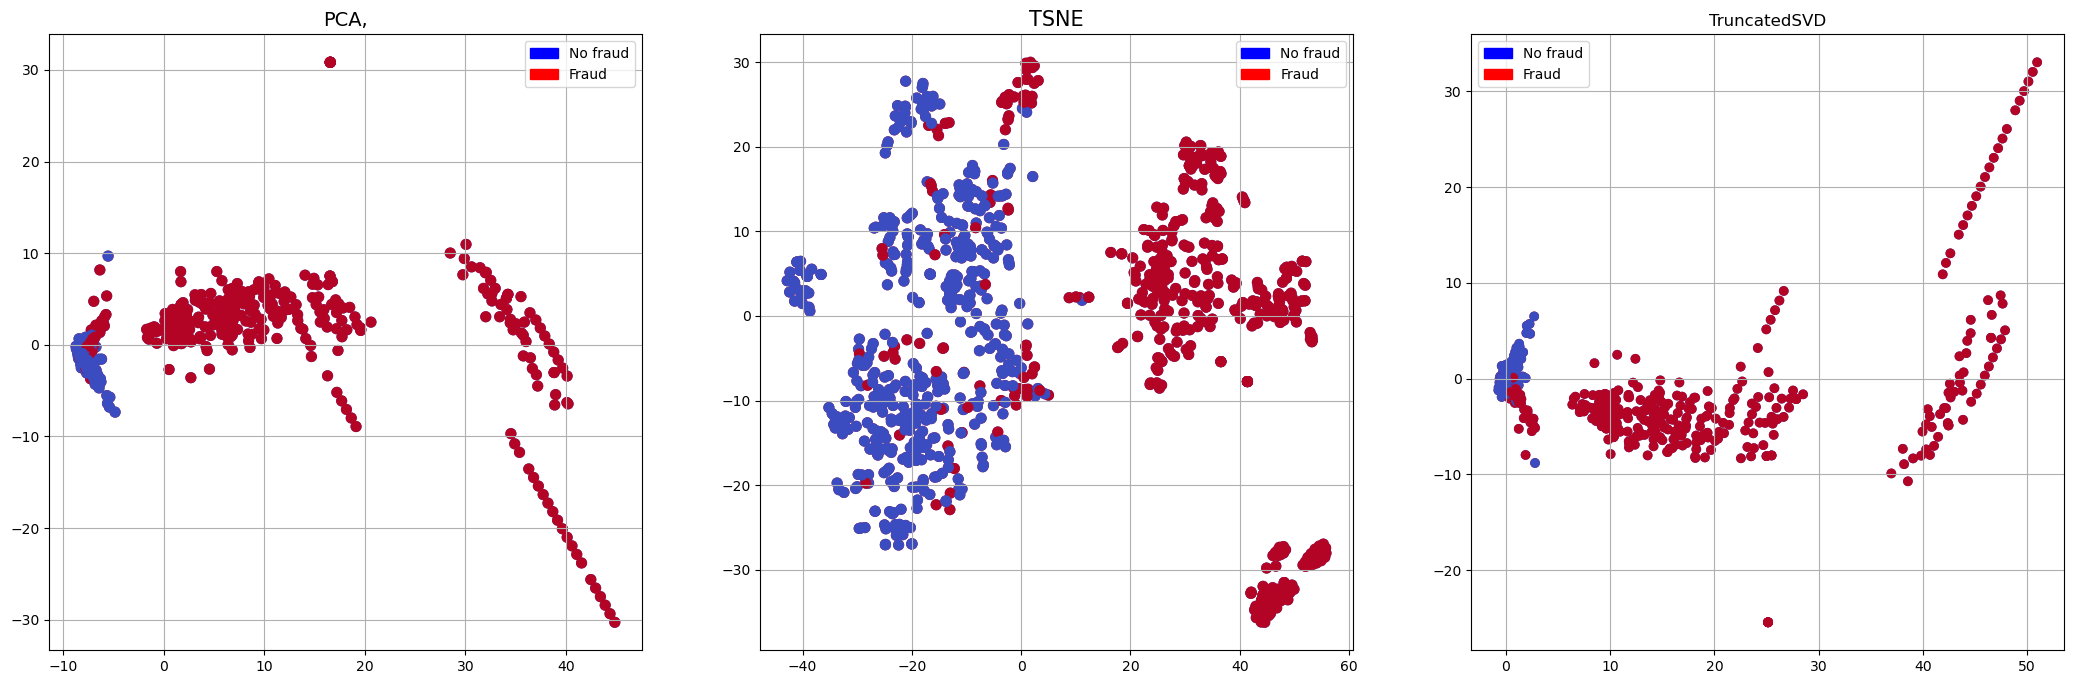

In [48]:
#lEts visualize it bY plotting scatter plot
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue',label = 'No fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(26,8))
#pca
ax1.scatter(x_pca_red[:,0],x_pca_red[:,1], c=(y==0),cmap="coolwarm",label="No Fraud", linewidths=2)

ax1.scatter(x_pca_red[:,0],x_pca_red[:,1],c=(y==1),cmap="coolwarm",label="Fraud", linewidths=2)
ax1.set_title("PCA,",fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch,red_patch])

# Tnse
ax2.scatter(x_tsne_red[:,0],x_tsne_red[:,1],c=(y==0),cmap="coolwarm",label="No fraud", linewidths=2)
ax2.scatter(x_tsne_red[:,0],x_tsne_red[:,1],c=(y==1),cmap="coolwarm",label="fraud", linewidths=2)
ax2.grid(True)
ax2.set_title("TSNE",fontsize=15)
ax2.legend(handles=[blue_patch,red_patch])


#TruncatedSVD
ax3.scatter(X_truncatedsvd_red[:,0],X_truncatedsvd_red[:,1],c=(y==0),cmap="coolwarm",label="No fraud")
ax3.scatter(X_truncatedsvd_red[:,0],X_truncatedsvd_red[:,1],c=(y==1),cmap="coolwarm",label="fraud")
ax3.grid(True)
ax3.set_title("TruncatedSVD")
ax3.legend(handles=[blue_patch,red_patch])





# Your job is to learn all the above dimension reduction technique  in detail

# Implementing Models

In [49]:
X=new_df.drop("Class",axis=1)
y=new_df["Class"]

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"y_test shape:{y_test.shape}")

X_train shape: (755, 29)
X_test shape: (189, 29)
Y_train shape: (755,)
y_test shape:(189,)


### In this classifiaction problem, I am going to use below algorithm
1. Logistic Regression
2. Decision Tree Classifier
3. Support vector Matrix Classifier
4. K Neighbour Classifier

In [93]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
# Importing support vector classifier
from sklearn.svm import SVC
# Importing KNearest Classifier
from sklearn.neighbors import KNeighborsClassifier
# Importing Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
# Creating a dictionary of model 
models={
    "logisticRegression": LogisticRegression(),
    
    "KNeighborsClassifier":KNeighborsClassifier(),
    "SVC":SVC(),
    "DecisionTressClassifier":DecisionTreeClassifier(),
    "RandomForestClassifer":RandomForestClassifier()
}

In [95]:
from sklearn.model_selection import cross_val_score
# Iterating through the dictioanry
for key,classifier  in models.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print(f"Trianing score of {key} classifier is {round(training_score.mean()*100,2)} %")
    

Trianing score of logisticRegression classifier is 95.23 %
Trianing score of KNeighborsClassifier classifier is 94.44 %
Trianing score of SVC classifier is 93.64 %
Trianing score of DecisionTressClassifier classifier is 91.79 %
Trianing score of RandomForestClassifer classifier is 94.44 %


## Hyperparameter Search using Grid Search
Lets have a look at the best parameter for our model.

In [97]:
# Hyper parameter using grid Search

from sklearn.model_selection import GridSearchCV

In [98]:
# Parameter of logistic Regression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [99]:
# Using GridSearchCV for choosing the best parameter
from sklearn.model_selection import GridSearchCV

# #best params for logistic regression
#1 seting parameter
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


#2. Applying GridSearchCV 
log_grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=log_reg_params,refit=True,cv=3,verbose=1)
# Refit =True is by default, the best parameter is trained in the model by itself.

#3. fit this new  model by X_trian , y_train.
log_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [100]:
# Lets see the logistic Regression best parameter
print(f"Best parameter: {log_grid_search.best_params_}")
print(f"Best score:{log_grid_search.best_score_}")

Best parameter: {'C': 1, 'penalty': 'l2'}
Best score:0.9443653955606147


In [101]:
log_reg_best=log_grid_search.best_estimator_

In [102]:
#  all Paarameter of KNearestClassifier
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [103]:
# best parameter fot K Neighbors CLassifier
"""
ball_tree’ will use BallTree

‘kd_tree’ will use KDTree

‘brute’ will use a brute-force search.

‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.

"""


k_params={
    "n_neighbors":list(range(0,10)),
    "algorithm":["auto", "ball_tree", "kd_tree", "brute"]
}
KN_grid_search=GridSearchCV(KNeighborsClassifier(),k_params,cv=3,refit=True,verbose=1)
KN_grid_search.fit(X_train,y_train)
print(f"Best params:{KN_grid_search.best_params_}")
print("Best score: {}".format(KN_grid_search.best_score_))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best params:{'algorithm': 'auto', 'n_neighbors': 3}
Best score: 0.9523071734227114


In [105]:
KN_best=KN_grid_search.best_estimator_

In [106]:
#Parameter of Decision Tree Classifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [107]:
# Finding best parameter for Decision Tree
Decision_tree_params={
    'max_depth':list(range(0,10)),
    'max_leaf_nodes':list(range(0,10)),
    'criterion':["gini","entropy"]  
}

Decision_grid_search=GridSearchCV(DecisionTreeClassifier(),Decision_tree_params,cv=3,refit=True,verbose=1)
Decision_grid_search.fit(X_train,y_train)
print(f" Decision tree's est parameter :{Decision_grid_search.best_params_}")
print("Best score: {}".format(Decision_grid_search.best_score_))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
 Decision tree's est parameter :{'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 4}
Best score: 0.9377358291700921


In [108]:
Decision_tree_best=Decision_grid_search.best_estimator_

In [109]:
#Have a look on SVC Classifier
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [110]:
# Best params for SVC
"""
C is Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive

kernel parameters selects the type of hyperplane used to separate the data.
Using 'linear' will use a linear hyperplane (a line in the case of 2D data).
' rbf' and 'poly' uses a non linear hyper-plane
kernels = [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’]
"""
svc_params={
    'C': [0.5, 0.7, 0.9, 1],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear']
}

SVC_grid_search=GridSearchCV(SVC(),svc_params,refit=True,verbose=1)
SVC_grid_search.fit(X_train,y_train)
print(f"Best parameter for SVC:{SVC_grid_search.best_params_}")
print("Best score obtain is :{}".format(SVC_grid_search.best_score_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter for SVC:{'C': 0.9, 'kernel': 'linear'}
Best score obtain is :0.9443708609271525


In [111]:
SVC_best=SVC_grid_search.best_estimator_

In [112]:
# And the last Random Forest Classifier
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [113]:
# Cross validation score on the model we receive by using GridSearchCV
from sklearn.model_selection import cross_val_score

new_models={
    "LogisticRegression":log_reg_best,
    "KNeighborsClassifier":KN_best,
    "DecisionTreeClassifier":Decision_tree_best,
    "SVC":SVC_best
}

for key,classifier in new_models.items():
    classifier.fit(X_train,y_train)
    New_training_score=cross_val_score(classifier,X_train,y_train,cv=5)
    print("New Trainig score of", key, "is",New_training_score.mean())
    


New Trainig score of LogisticRegression is 0.9523178807947019
New Trainig score of KNeighborsClassifier is 0.9549668874172186
New Trainig score of DecisionTreeClassifier is 0.9350993377483443
New Trainig score of SVC is 0.9443708609271525


From above training score of four model, we see that SVM and KNearestClassifier has best score .

## Validation
Now, going to test our model on various matrix to see which one  is the best.

In [117]:
# Funstion for roc_score 
from sklearn.metrics import roc_auc_score
def model_roc_auc_score(model,input_data,label):
    pred=model.predict(input_data)
    rocauc_score=roc_auc_score(label,pred)
    return rocauc_score

In [137]:
#roc_auc_score on train data
print(f"logisticRegression Classifier : {model_roc_auc_score(log_reg_best,X_train,y_train)}")
print(f"Decision Tree Classifier : {model_roc_auc_score(Decision_tree_best,X_train,y_train)}")
print(f"SVC Classifier: {model_roc_auc_score(SVC_best,X_train,y_train)}")
print(f"KNeighborsClassifier : {model_roc_auc_score(KN_best,X_train,y_train)}")

logisticRegression Classifier : 0.9639372307172426
Decision Tree Classifier : 0.9347455717946552
SVC Classifier: 0.9639372307172426
KNeighborsClassifier : 0.9695552082453323


In [138]:
# roc_auc_score of model on test data
# For logistic regression
print(f"logisticRegression Classifier : {model_roc_auc_score(log_reg_best,X_test,y_test)}")
print(f"Decision Tree Classifier : {model_roc_auc_score(Decision_tree_best,X_test,y_test)}")
print(f"SVC Classifier: {model_roc_auc_score(SVC_best,X_test,y_test)}")
print(f"KNeighborsClassifier : {model_roc_auc_score(KN_best,X_test,y_test)}")


logisticRegression Classifier : 0.9185981098109811
Decision Tree Classifier : 0.8995274527452745
SVC Classifier: 0.9185981098109811
KNeighborsClassifier : 0.9143789378937893


#LogisticRegression and SVM show good roc_auc_score 


### ploting Roc Curve

In [139]:
# Prediction by various model on X_test data
log_reg_pred=log_reg_best.predict(X_test)
KN_pred=KN_best.predict(X_test)
Deci_tree_pred=Decision_tree_best.predict(X_test)
SVC_pred=SVC_best.predict(X_test)

In [134]:
# Calculating false positive rate , True positive rate and threshold
from sklearn.metrics import roc_curve
"""
fpr, tpr, thresold = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))


"""
log_fpr,log_tpr,log_theshold= roc_curve(y_test,log_reg_pred)
kn_fpr, kn_tpr,kn_threshold=roc_curve(y_test,KN_pred)
deci_fpr,deci_tpr,deci_threshold=roc_curve(y_test,Deci_tree_pred)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,SVC_pred)


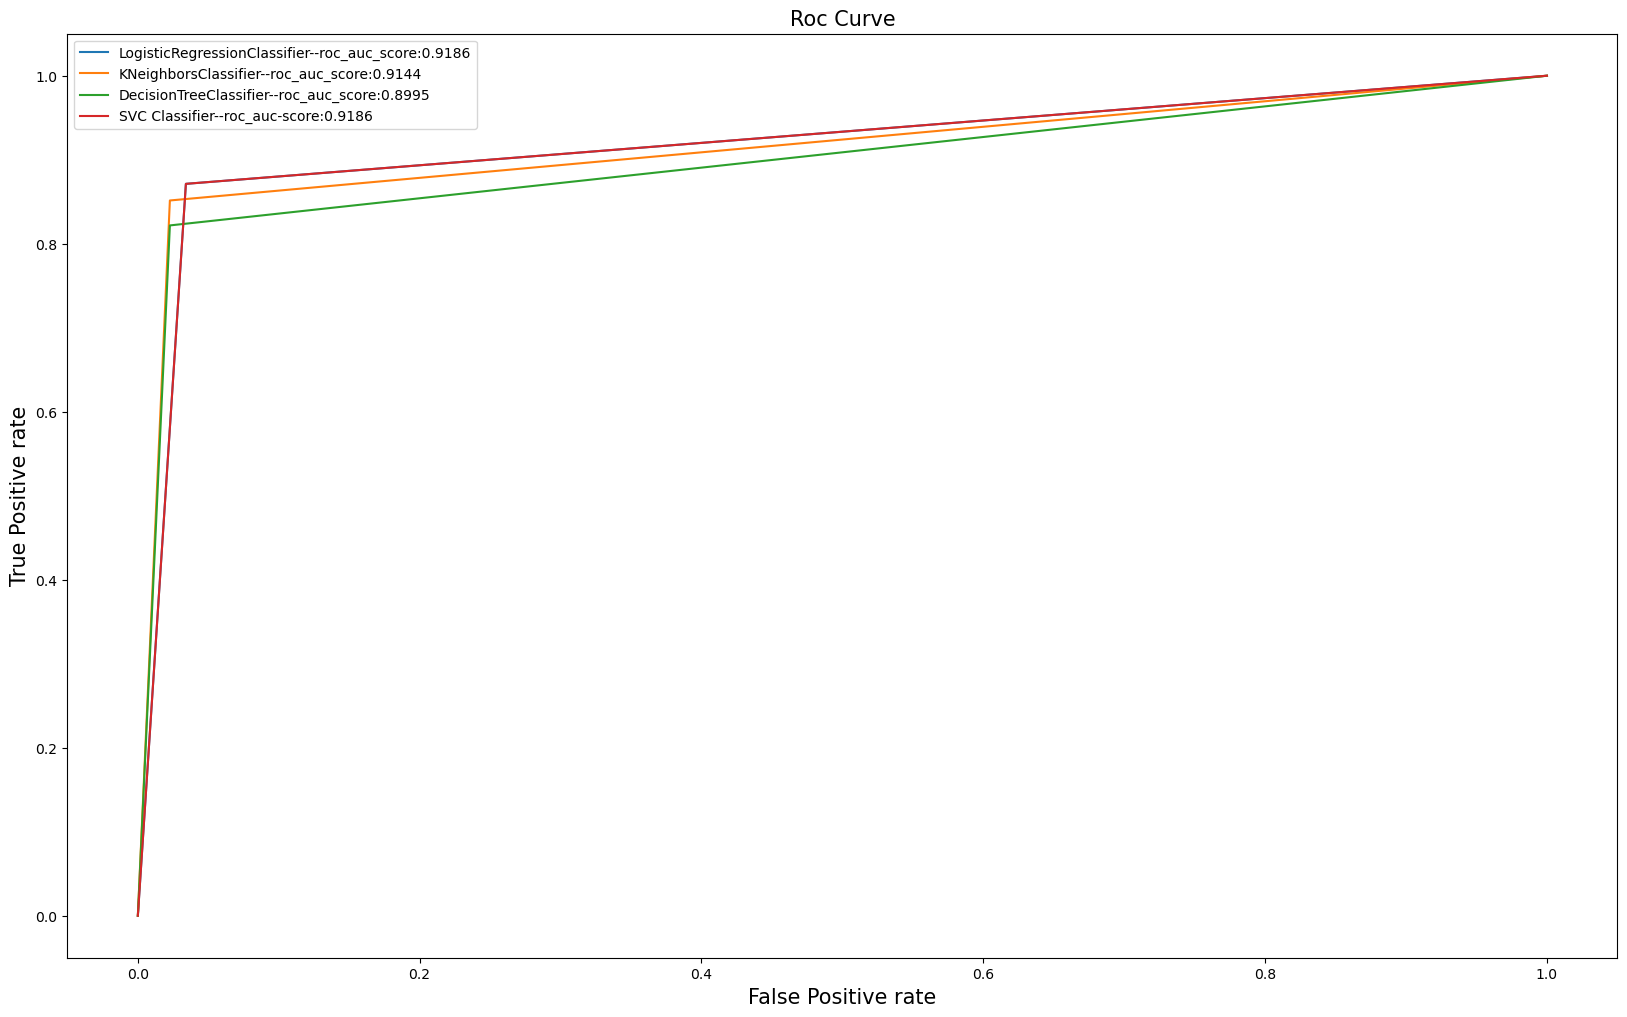

In [143]:
# finally  PLotting roc_curve
plt.figure(figsize=(20,12))
plt.title("Roc Curve",fontsize=15)
plt.plot(log_fpr,log_tpr,label=f"LogisticRegressionClassifier--roc_auc_score:{model_roc_auc_score(log_reg_best,X_test,y_test):.4f}")
plt.plot(kn_fpr,kn_tpr,label="KNeighborsClassifier--roc_auc_score:{:.4f}".format(model_roc_auc_score(KN_best,X_test,y_test)))
plt.plot(deci_fpr,deci_tpr,label=f"DecisionTreeClassifier--roc_auc_score:{model_roc_auc_score(Decision_tree_best,X_test,y_test):.4f}")
plt.plot(svc_fpr,svc_tpr,label="SVC Classifier--roc_auc-score:{:.4f}".format(model_roc_auc_score(SVC_best,X_test,y_test)))

plt.ylabel("True Positive rate",fontsize=15)
plt.xlabel("False Positive rate",fontsize=15)
plt.legend()


In [212]:
# function for confusion matrics
from sklearn.metrics import confusion_matrix
def model_confusion_matrix(model,input_data,label):
    pred=model.predict(input_data)
    cm=confusion_matrix(label,pred)
    return print(cm)

#Confusion matrix
validating our model on test data set

In [213]:
# Confusion matrix for logisticRegression model
log_reg_cf=model_confusion_matrix(log_reg_best,X_test,y_test)

log_reg_cf


[[85  3]
 [13 88]]


In [158]:
# confusion matrix for KNN Classifier
KN_cf=model_confusion_matrix(KN_best,X_test,y_test)
KN_cf

array([[86,  2],
       [15, 86]], dtype=int64)

In [162]:
#Confusion matrix for Decision Tress Classifier
Decision_tree_cf=model_confusion_matrix(Decision_tree_best,X_test,y_test)
Decision_tree_cf

array([[86,  2],
       [18, 83]], dtype=int64)

In [163]:
#Confusion Matrix for SVC 
SVC_cf=model_confusion_matrix(SVC_best,X_test,y_test)
SVC_cf

array([[85,  3],
       [13, 88]], dtype=int64)

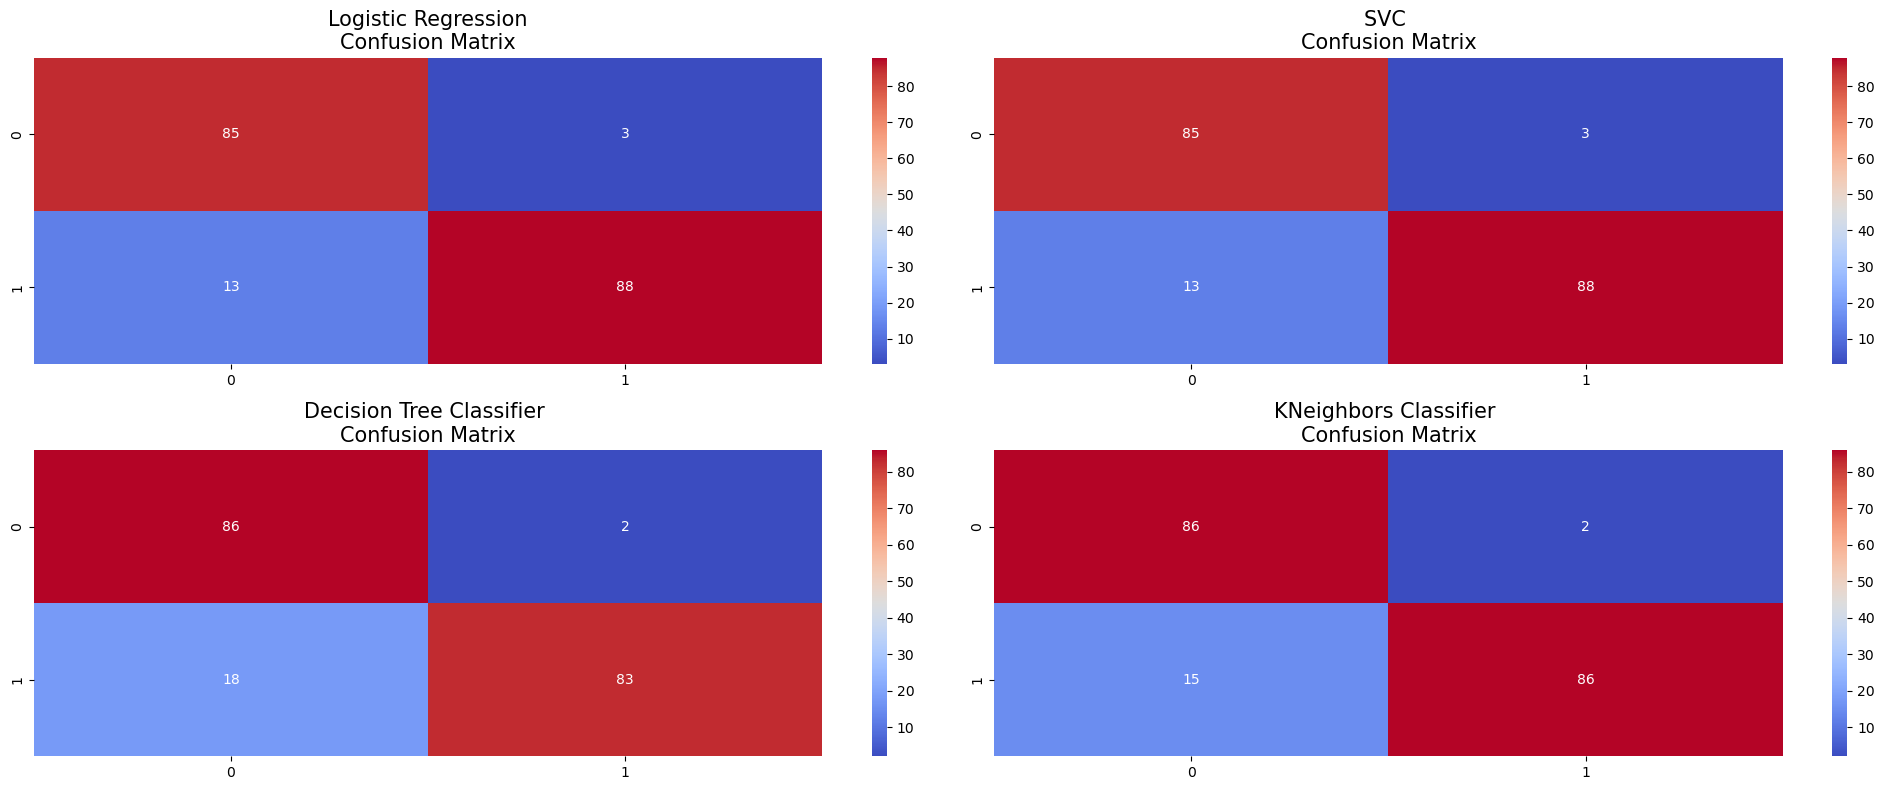

In [174]:
# Visualize all these confusion matrix
fig,ax=plt.subplots(2,2,figsize=(20,8))
sns.heatmap(log_reg_cf,annot=True,cmap="coolwarm",ax=ax[0,0])
ax[0,0].set_title("Logistic Regression\nConfusion Matrix",fontsize=15)

sns.heatmap(SVC_cf,annot=True,cmap="coolwarm",ax=ax[0,1])
ax[0,1].set_title("SVC \nConfusion Matrix",fontsize=15)

sns.heatmap(Decision_tree_cf,annot=True,cmap="coolwarm",ax=ax[1,0])
ax[1,0].set_title("Decision Tree Classifier \nConfusion Matrix",fontsize=15)

sns.heatmap(KN_cf,annot=True,cmap="coolwarm",ax=ax[1,1])
ax[1,1].set_title("KNeighbors Classifier \nConfusion Matrix",fontsize=15)

plt.tight_layout()

#Value along the horizontal are the " "  value and on the vertical are the "" value.

In [ ]:
# now have a look on the classification report on test data..


In [179]:
# function for classification report 
from sklearn.metrics import classification_report
def model_classification_report(model,input_data,label):
    pred=model.predict(input_data)
    report=classification_report(label,pred)
    return print(report) 

In [192]:
new_models={
    "LogisticRegression":log_reg_best,
    "KNeighborsClassifier":KN_best,
    "DecisionTreeClassifier":Decision_tree_best,
    "SVC":SVC_best
}

for key,model in new_models.items():
    
    print(key,"Classification_report")
    model_classification_report(model, X_test,y_test)
    

LogisticRegression Classification_report
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        88
           1       0.97      0.87      0.92       101

    accuracy                           0.92       189
   macro avg       0.92      0.92      0.92       189
weighted avg       0.92      0.92      0.92       189

KNeighborsClassifier Classification_report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        88
           1       0.98      0.85      0.91       101

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.92      0.91      0.91       189

DecisionTreeClassifier Classification_report
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        88
           1       0.98      0.82      0.89       101

    accuracy                           0.89       189

In [ ]:
# Accuracy score
# function calculating accuracy score
from sklearn.metrics import accuracy_score
def model_accuracy(model, input_data, label):
    pred=model.predict(input_data)
    accuracy=accuracy_score(label,pred)
    return accuracy

In [196]:
new_models={
    "LogisticRegression":log_reg_best,
    "KNeighborsClassifier":KN_best,
    "DecisionTreeClassifier":Decision_tree_best,
    "SVC":SVC_best
}

for model_name,model in new_models.items():
    
    score=model_accuracy(model,X_test,y_test)
    print( model_name, "model accuracy is :{:.4f}".format(score))

LogisticRegression model accuracy is :0.9153
KNeighborsClassifier model accuracy is :0.9101
DecisionTreeClassifier model accuracy is :0.8942
SVC model accuracy is :0.9153


#up to now logisticRegression ans SVC perform good over other trained model.

# For Now , I don't have any idea about this PR AUC Score but i will read this latter


In [195]:
#Importing library 
from sklearn.metrics import average_precision_score
lr_auprc=average_precision_score(y_test,log_reg_pred)
lr_auprc

0.9113464459999114

In [199]:
predict={
    "LogisticRegression":log_reg_pred,
    "KNeighborsClassifier":KN_pred,
    "DecisionTreeClassifier":Deci_tree_pred,
    "SVC":SVC_pred
}
for model_name, model_prediction in predict.items():
    auprc_score=average_precision_score(y_test,model_prediction)
    print("AU PRC Score of ",model_name, "is",auprc_score)
    


AU PRC Score of  LogisticRegression is 0.9113464459999114
AU PRC Score of  KNeighborsClassifier is 0.9114982926864116
AU PRC Score of  DecisionTreeClassifier is 0.8976842222037329
AU PRC Score of  SVC is 0.9113464459999114


## Ploting precision recall curve (kindly read about this)
Since SVC & LogisticRegression both have good AU PRC score , i am ploting curve of only these two model
leave it for now , will ploot these curve after geting full information about it.


## Testing

In [215]:
# Confusion matrix of all 4 model on original test data.
# Using the function model_cunfusion_matrix() created above.
for model_name ,model in new_models.items():
    print(model_name)
    model_confusion_matrix(model,org_xtest,org_ytest)
    

LogisticRegression
[[54826  2035]
 [    8    90]]
KNeighborsClassifier
[[55025  1836]
 [    9    89]]
DecisionTreeClassifier
[[54468  2393]
 [   13    85]]
SVC
[[54953  1908]
 [    8    90]]


In [217]:
#Classification report of all four model on original test data
print("Classification report on original Test data")
for model_name,model in new_models.items():
    
    print(model_name)
    model_classification_report(model, org_xtest,org_ytest)

Classification report on original Test data
LogisticRegression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.04      0.92      0.08        98

    accuracy                           0.96     56959
   macro avg       0.52      0.94      0.53     56959
weighted avg       1.00      0.96      0.98     56959

KNeighborsClassifier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56959
   macro avg       0.52      0.94      0.54     56959
weighted avg       1.00      0.97      0.98     56959

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56861
           1       0.03      0.87      0.07        98

    accuracy                           0.96     56959
   macro avg       0.

In [219]:
# Accuracy 
for model_name,model in new_models.items():
    
    score=model_accuracy(model,org_xtest,org_ytest)
    print( model_name, "model accuracy is :{:.4f}".format(score))

LogisticRegression model accuracy is :0.9641
KNeighborsClassifier model accuracy is :0.9676
DecisionTreeClassifier model accuracy is :0.9578
SVC model accuracy is :0.9664


In [223]:
#precision recall curve
from sklearn.metrics import precision_recall_curve


prc=precision_recall_curve()